## Description of the project

Here I analyzed campaign donation data of 2016 general election, released by FEC (http://classic.fec.gov/finance/disclosure/ftpdet.shtml).
I have only considered data from 2015-11-01 through election day (2016-11-08) and only donations to either Democratic or Republican party.
During this analysis, the average, total sum and count of donations, by individuals and corporations, have been studied in each state.

### Summary of findings
-Based on this data, the total number of donations to Democratic party's candidates are higher than their respective Republican counterparts. In contrast, the average amount of donation is in favor of Republican candidates.
-One interesting result found in this study is that the average donations by corporations to the Republican party's candidates are higher by far in most states.
-The data was split chronologically into two sections, i.e. the last 3 months before election and the first 9 months and the same variables ( average, sum and number of donations) were studied in these time periods. This partitioning was chosen on purpose, with the reason being both parties had their convention around the end of July 2016, so it would be interesting to see how donors reacted to the elected candidates by each party.

### Binary classification problem
After pre-processing the data and defining some attributes for both parties in each state, I trained many classifiers using %66 of the data as the training set, and the remaining as the test set. I extracted the labels from wikipedia, which determined which party won in each state. 
I applied Logistic regression and SVM (Support Vector Machine) as my classifiers. The best accuracy on test set was achieved by SVM (%82).

### Importing necessary packages

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data sets

In [2]:
sel_column_1 = ["NaN","TRANSACTION_DT", "TRANSACTION_AMT","STATE", "OTHER_ID", "CAND_PTY_AFFILIATION", "CAND_NAME"]
candidate_name=['TRUMP, DONALD J. / MICHAEL R. PENCE', 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE']
name_don=["CMTE_ID","AMNDT_IND","RPT_TP","TRANSACTION_PGI","IMAGE_NUM","TRANSACTION_TP","ENTITY_TP","NAME","CITY","STATE","ZIP_CODE","EMPLOYER","OCCUPATION","TRANSACTION_DT","TRANSACTION_AMT","OTHER_ID","TRAN_ID","FILE_NUM","MEMO_CD","MEMO_TEXT","SUB_ID"]
df_don = pd.read_csv("./data/trimed_2016_data_main.csv", sep='|')
df_don.head(5)

/usr/programs/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0 TRANSACTION_DT  TRANSACTION_AMT STATE OTHER_ID  \
0           0     2015-11-17              500    FL      NaN   
1           1     2015-11-17              250    FL      NaN   
2           2     2015-11-23              250    FL      NaN   
3           3     2015-11-19              500    FL      NaN   
4           4     2015-11-23              250    FL      NaN   

  CAND_PTY_AFFILIATION         CAND_NAME  
0                  REP  ANTHONY, MALCOLM  
1                  REP  ANTHONY, MALCOLM  
2                  REP  ANTHONY, MALCOLM  
3                  REP  ANTHONY, MALCOLM  
4                  REP  ANTHONY, MALCOLM

In [14]:
us_states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY","GU","PR","VI"]
us_states = sorted(us_states)

In [5]:
sel_column = ["TRANSACTION_DT", "TRANSACTION_AMT","STATE", "OTHER_ID", "CAND_PTY_AFFILIATION", "CAND_NAME"]
df_don2 = df_don[sel_column]
#Converting Transaction dates to Panda's datatime object:
df_don2["TRANSACTION_DT"] = pd.to_datetime(df_don2["TRANSACTION_DT"])

/usr/programs/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Categorizing donations 
Based on the OTHER_ID value, empty values refer to individual donations and other values correspond to corporation.
By using categorize_donor function, corporate donations receive other_id equal to 1, while individuals other_id is set to 0

In [8]:
df_don2["OTHER_ID"].fillna(value=0, inplace=True)

/usr/programs/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
def categorize_donor(num):
    if num != 0:
        return int(1)
    else:
        return 0

In [11]:
df_don2["OTHER_ID"] = df_don2["OTHER_ID"].apply(categorize_donor)
df_state = df_don2[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT"]]

/usr/programs/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Grouping donations only based on the parties:

In [87]:
df_grp_party = df_state.groupby(["CAND_PTY_AFFILIATION"])

448.93529476069813

### Average Donation

In [103]:
print df_grp_party.mean()

                      TRANSACTION_AMT
CAND_PTY_AFFILIATION                 
DEM                        132.053521
REP                        448.935295


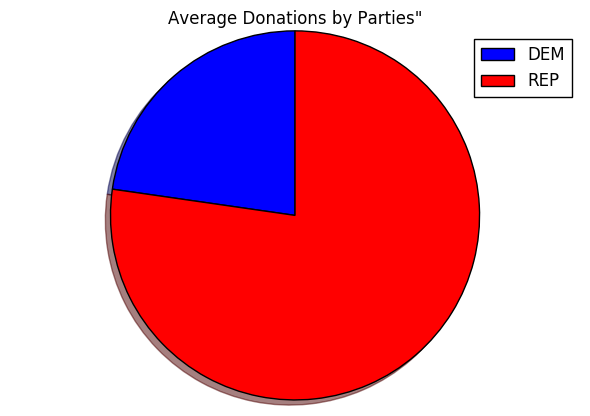

In [131]:
labels = ['DEM', 'REP']
sizes = [df_grp_party.mean().unstack()[0], df_grp_party.mean().unstack()[1]]
explode = (0, 0)
colors = ['blue', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Average Donations to Parties')
plt.show()

### Total Number of Donations

In [104]:
print df_grp_party.count()

                        STATE  TRANSACTION_AMT
CAND_PTY_AFFILIATION                          
DEM                   4825789          4825789
REP                   1225774          1225774


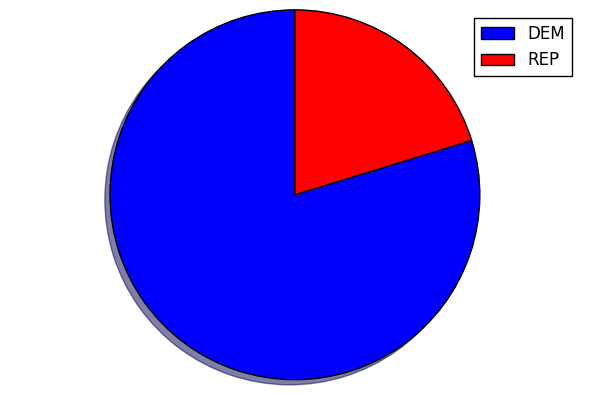

In [129]:
labels = ['DEM', 'REP']
sizes = [df_grp_party.count().unstack()[0], df_grp_party.count().unstack()[1]]
explode = (0, 0)
colors = ['blue', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Total Number of Donations to Parties')
plt.show()

### Total Amount of Donations

In [105]:
print df_grp_party.sum()

                      TRANSACTION_AMT
CAND_PTY_AFFILIATION                 
DEM                         637262429
REP                         550293212


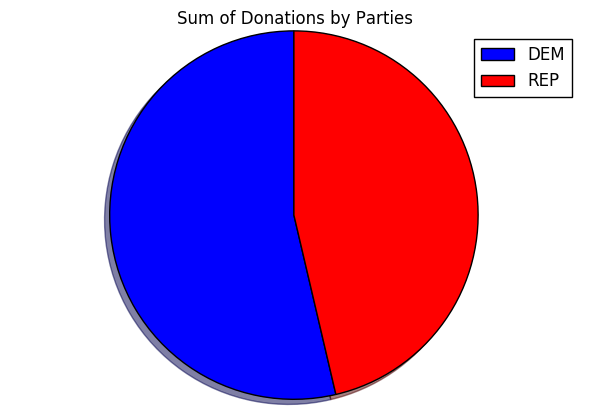

In [132]:
labels = ['DEM', 'REP']
sizes = [df_grp_party.sum().unstack()[0], df_grp_party.sum().unstack()[1]]
explode = (0, 0)
colors = ['blue', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Sum of Donations to Parties')
plt.show()

### Grouping donations by states and the parties, summed over all dates

#### First total donation regardless of who donated

In [12]:
# now we group df by state and party
df_grp_state = df_state.groupby(["CAND_PTY_AFFILIATION", "STATE"])

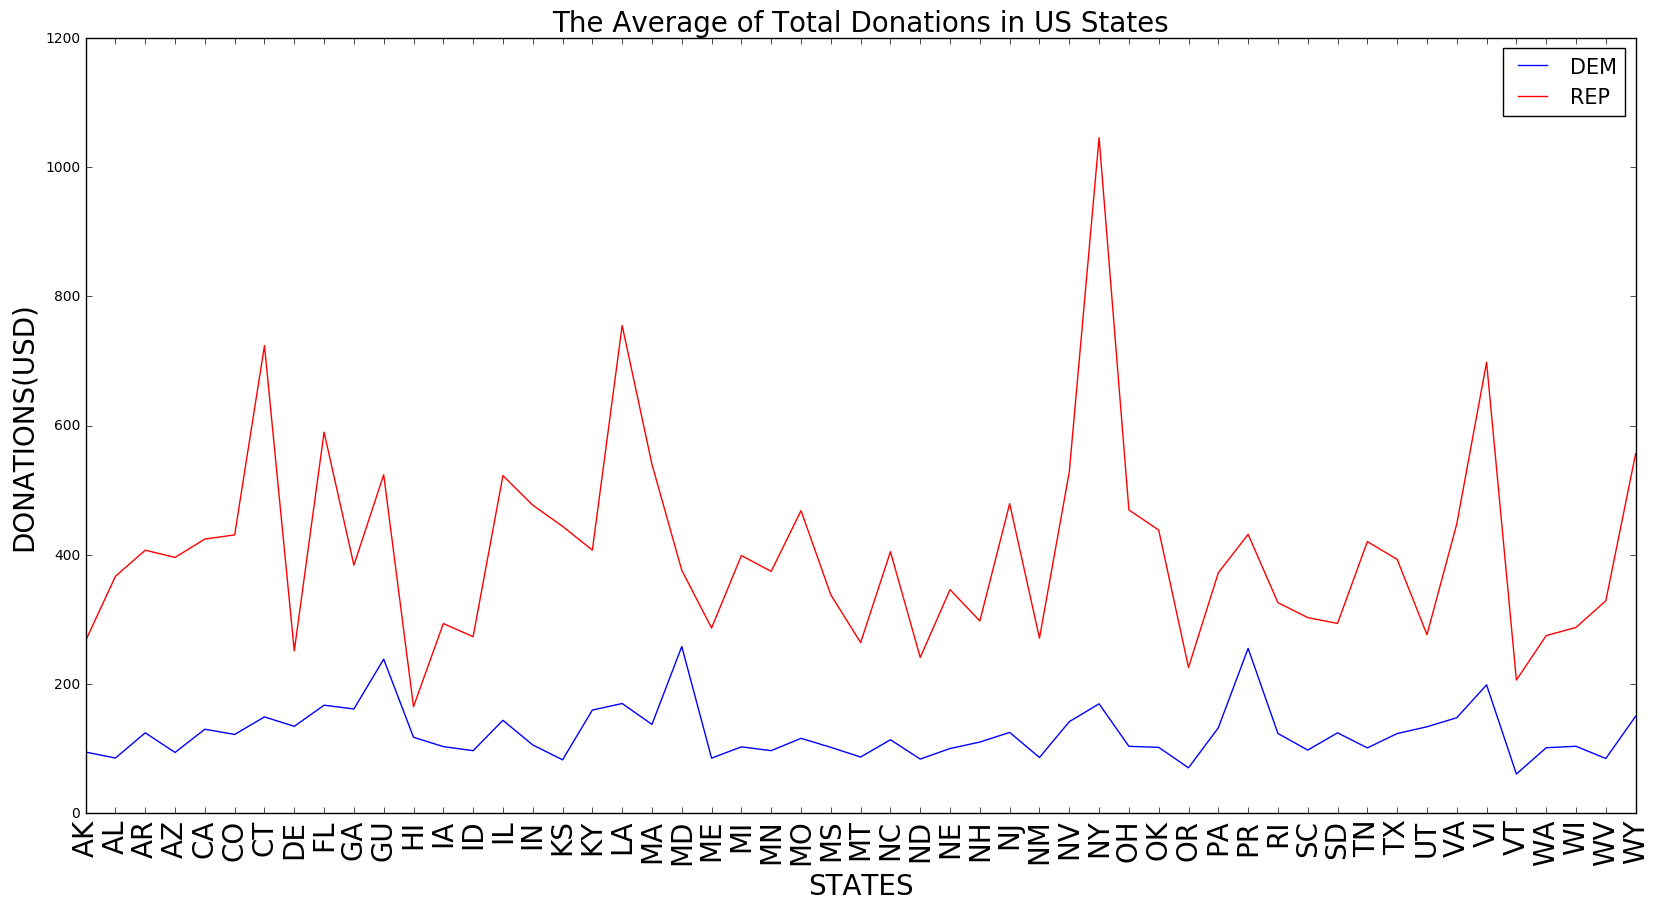

In [17]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_state.mean().unstack().ix["DEM",:53]), label='DEM')
plt.plot(np.array(df_grp_state.mean().unstack().ix["REP",:53]),'r', label='REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Average of Total Donations in US States', fontsize=20)

In all the states, the average donation is higher for Republican party.

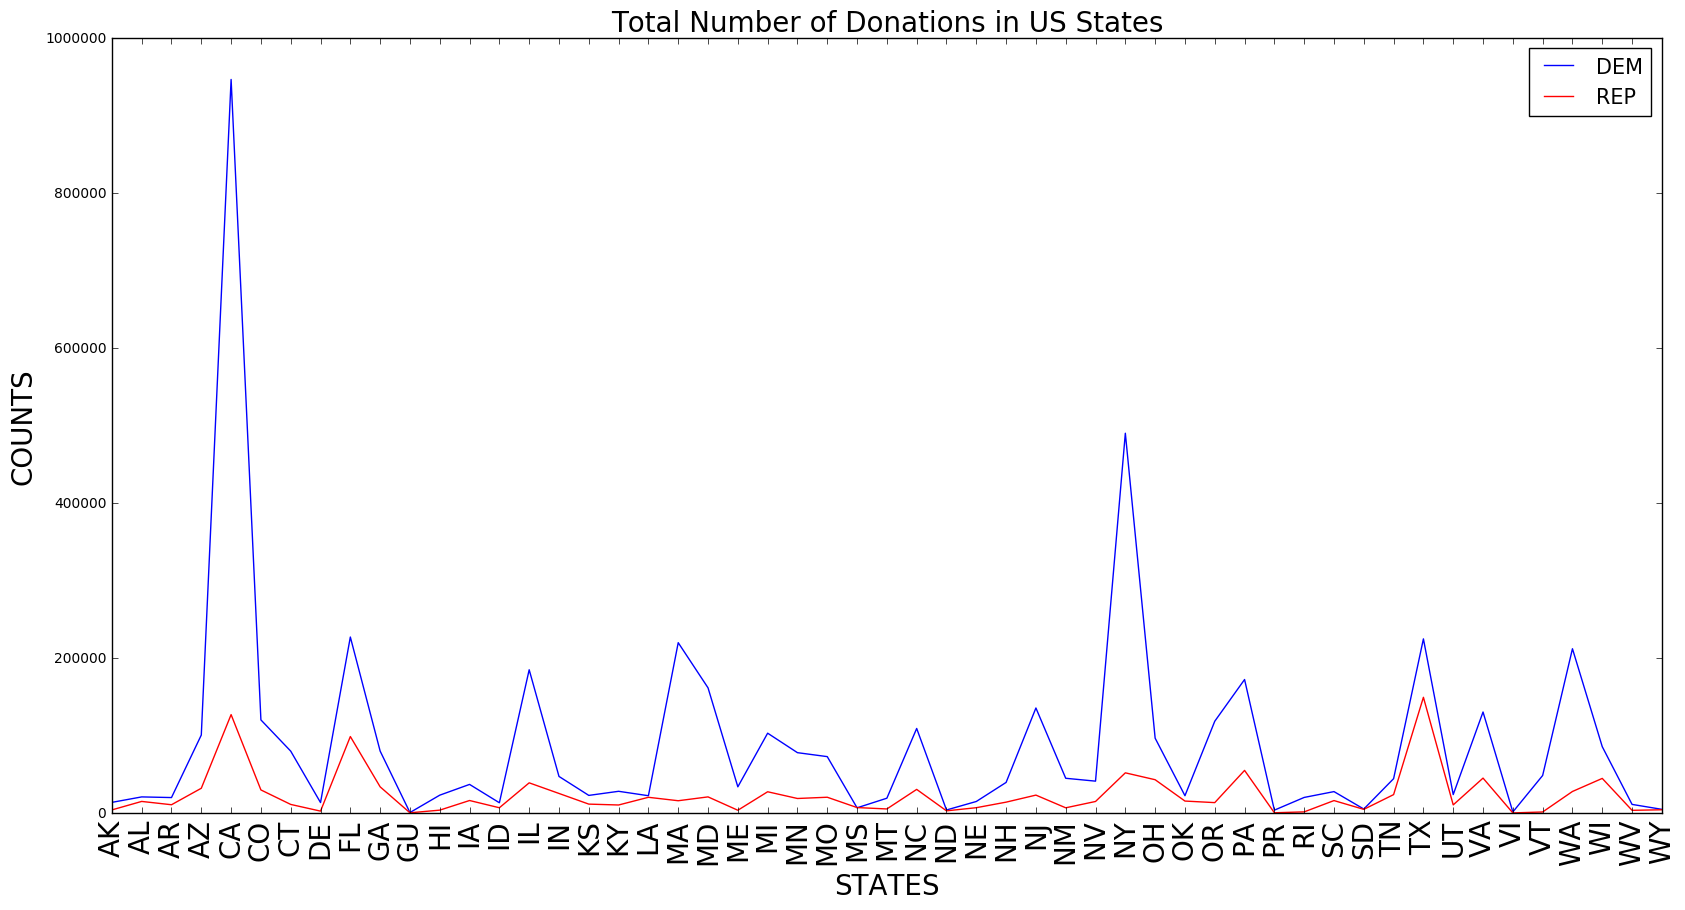

In [18]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_state.count().unstack().ix["DEM",:53]), label='DEM')
plt.plot(np.array(df_grp_state.count().unstack().ix["REP",:53]),'r', label='REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States', fontsize=20)

In all the states, the number of donations is higher for Democratic party.

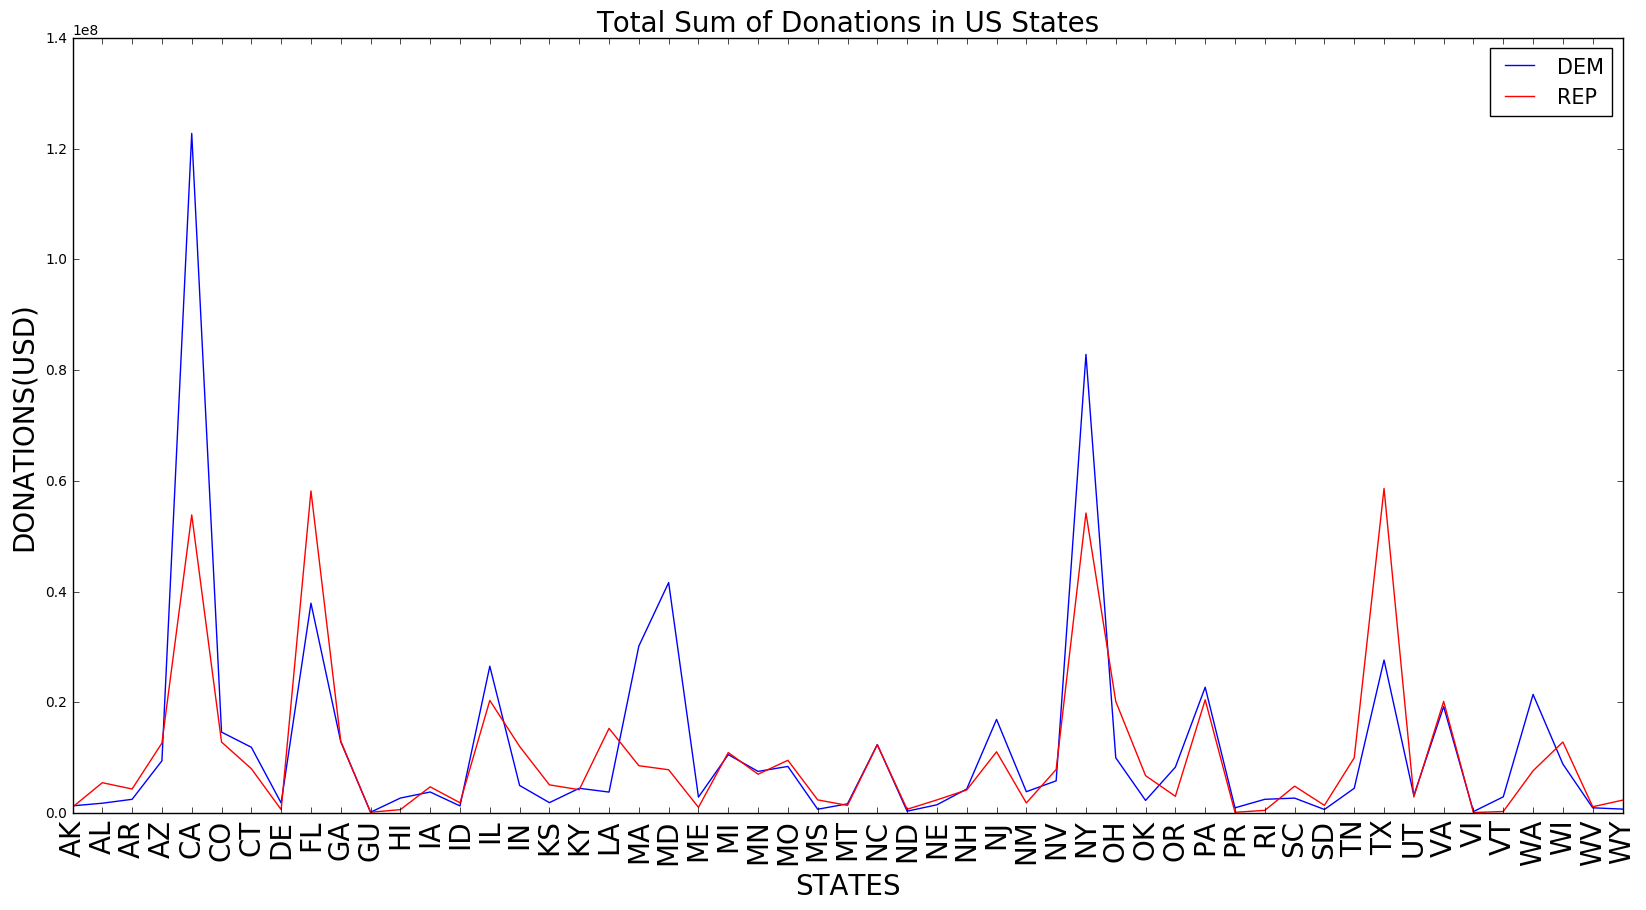

In [19]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_state.sum().unstack().ix["DEM",:53]), label='DEM')
plt.plot(np.array(df_grp_state.sum().unstack().ix["REP",:53]),'r', label='REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('Total Sum of Donations in US States', fontsize=20)

### Second, only donations from individuals

In [20]:
df3 = df_don2[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT", "OTHER_ID"]]
df3 = df3[df3["OTHER_ID"] == 0]
df3 = df3[["STATE", "CAND_PTY_AFFILIATION", "TRANSACTION_AMT"]]
df_grp_state_ind = df3.groupby(["CAND_PTY_AFFILIATION", "STATE"])

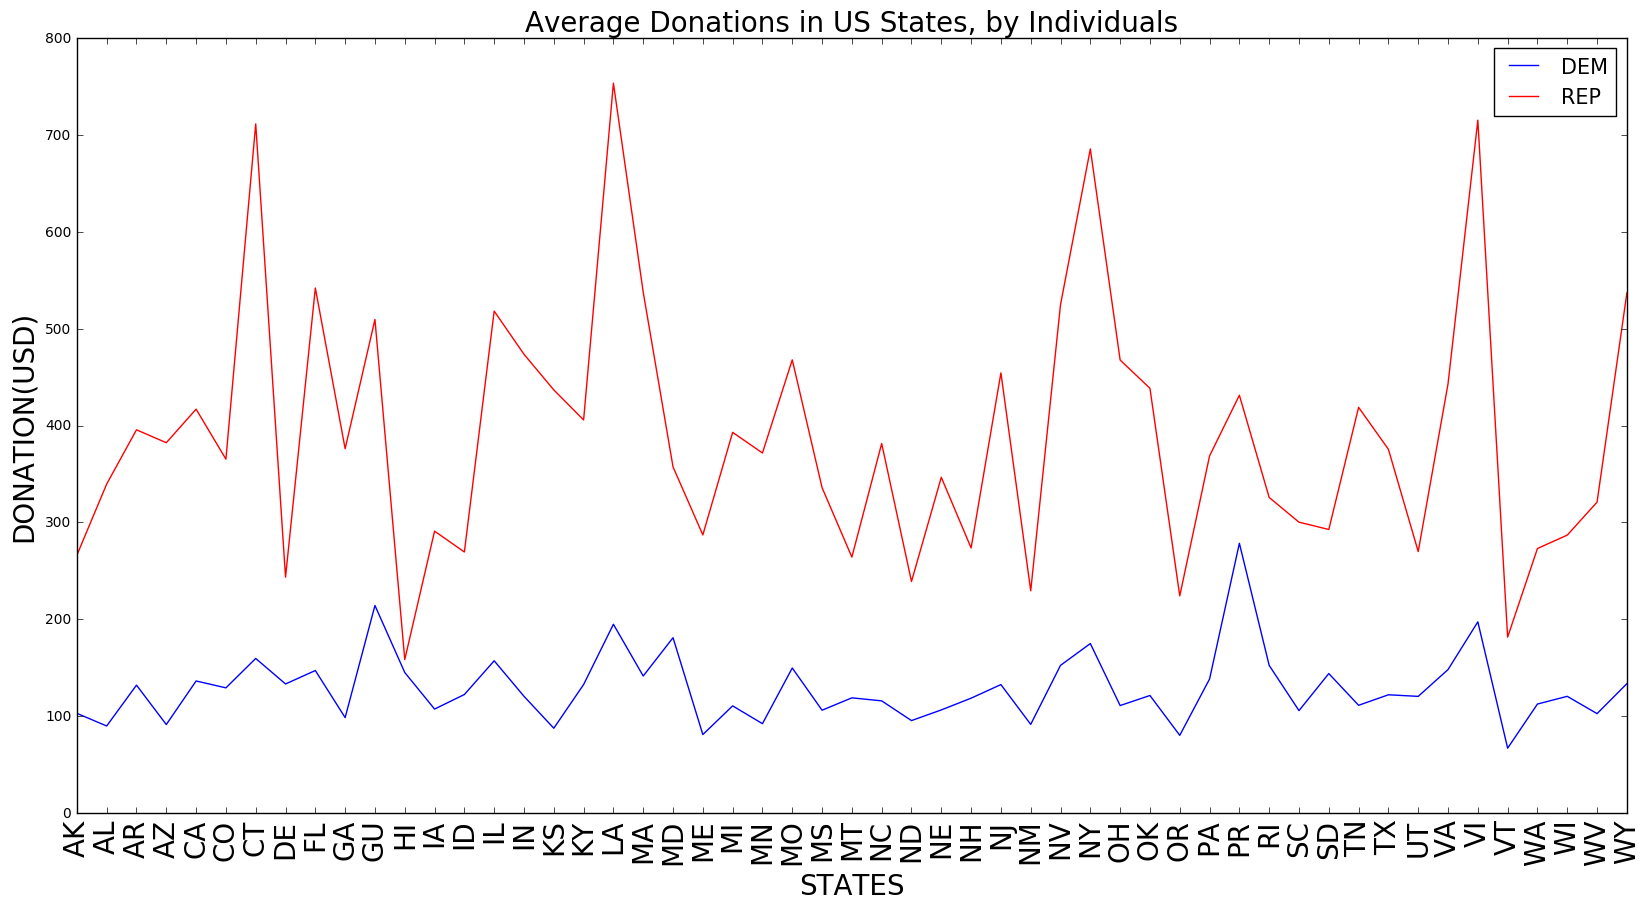

In [21]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_state_ind.mean().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_state_ind.mean().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATION(USD)', fontsize = 20)
plt.title('Average Donations in US States, by Individuals', fontsize=20)

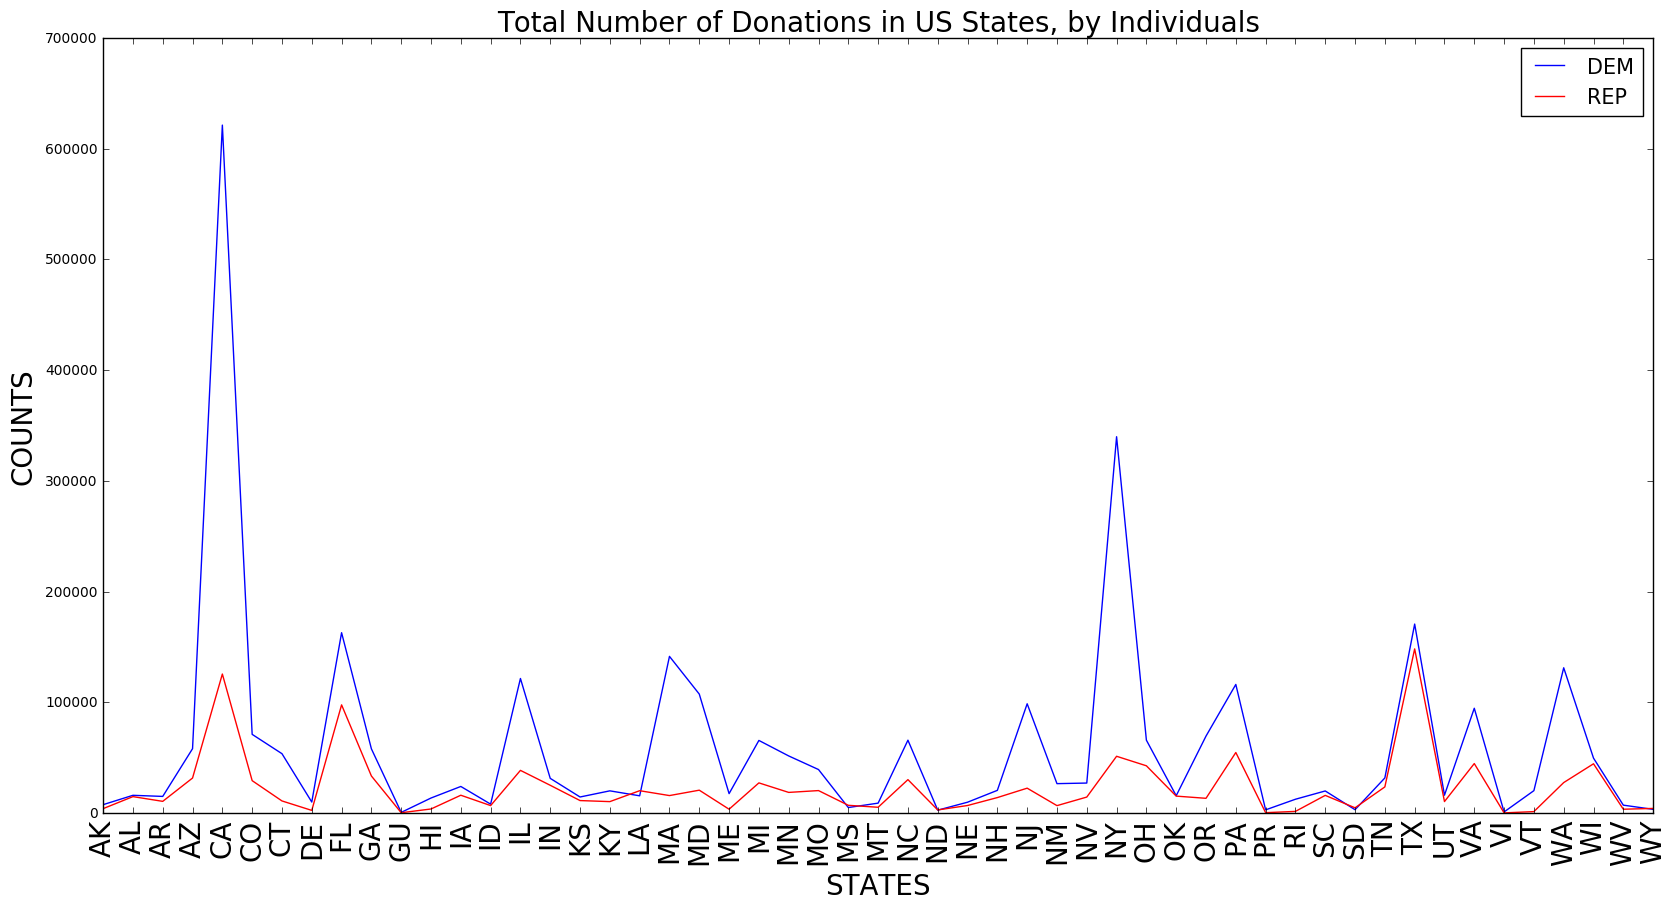

In [22]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_state_ind.count().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_state_ind.count().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States, by Individuals', fontsize=20)

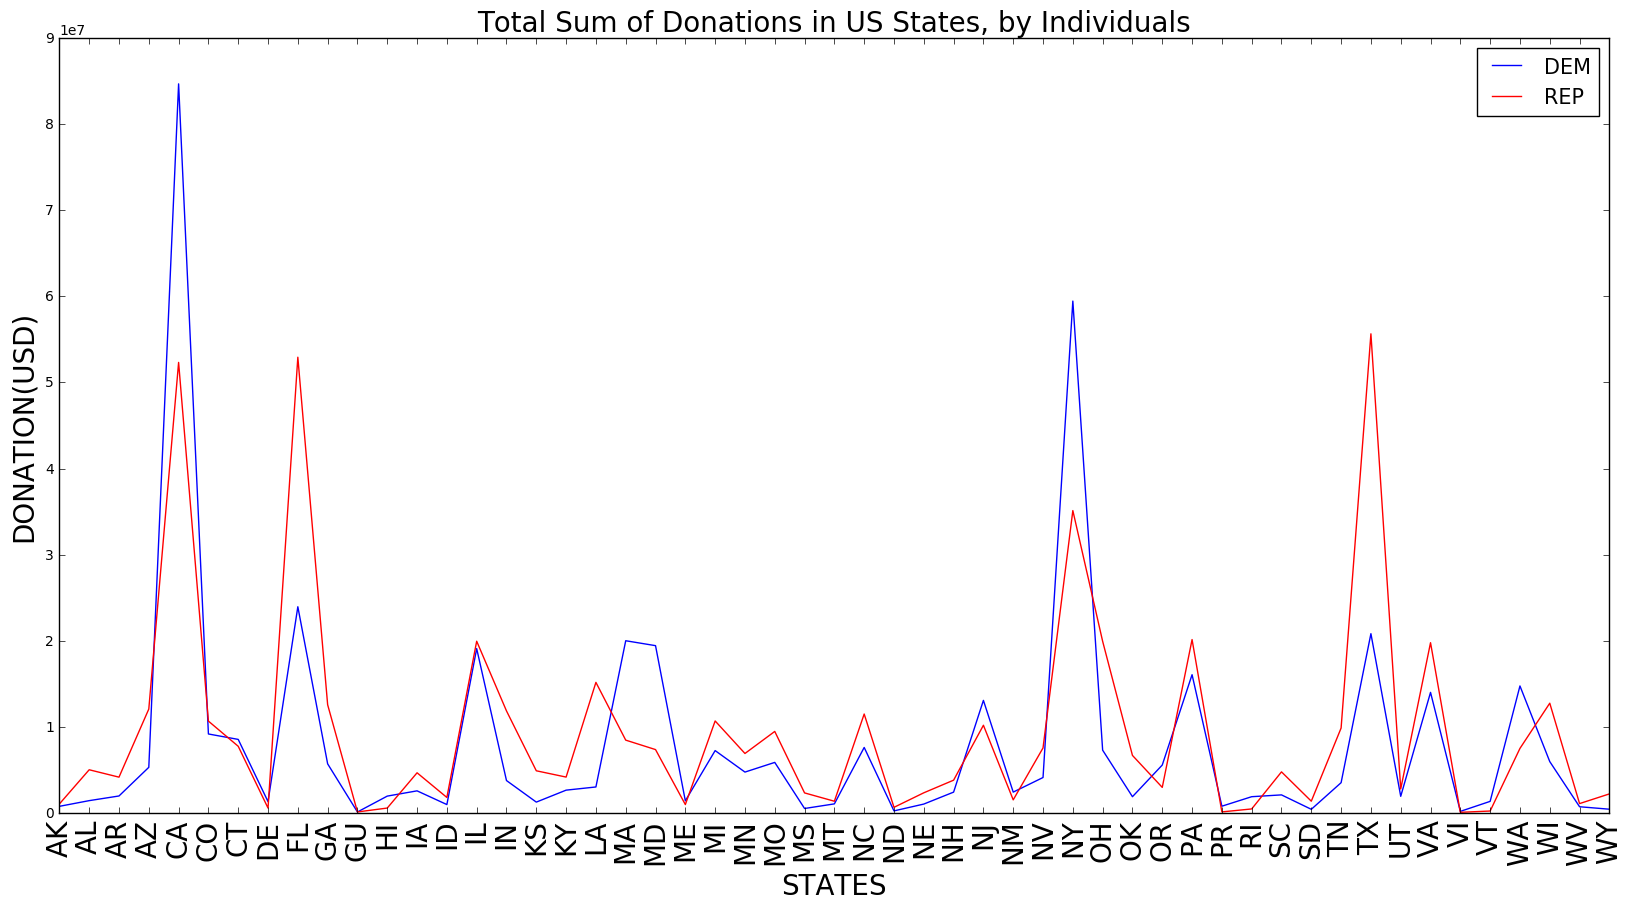

In [23]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_state_ind.sum().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_state_ind.sum().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATION(USD)', fontsize = 20)
plt.title('Total Sum of Donations in US States, by Individuals', fontsize=20)

### Third, donations by corporations

In [25]:
df4 = df_don2[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT", "OTHER_ID"]]
df4 = df4[df4["OTHER_ID"] == 1]
df4 = df4[["STATE", "CAND_PTY_AFFILIATION", "TRANSACTION_AMT"]]
df_grp_state_corp = df4.groupby(["CAND_PTY_AFFILIATION", "STATE"])

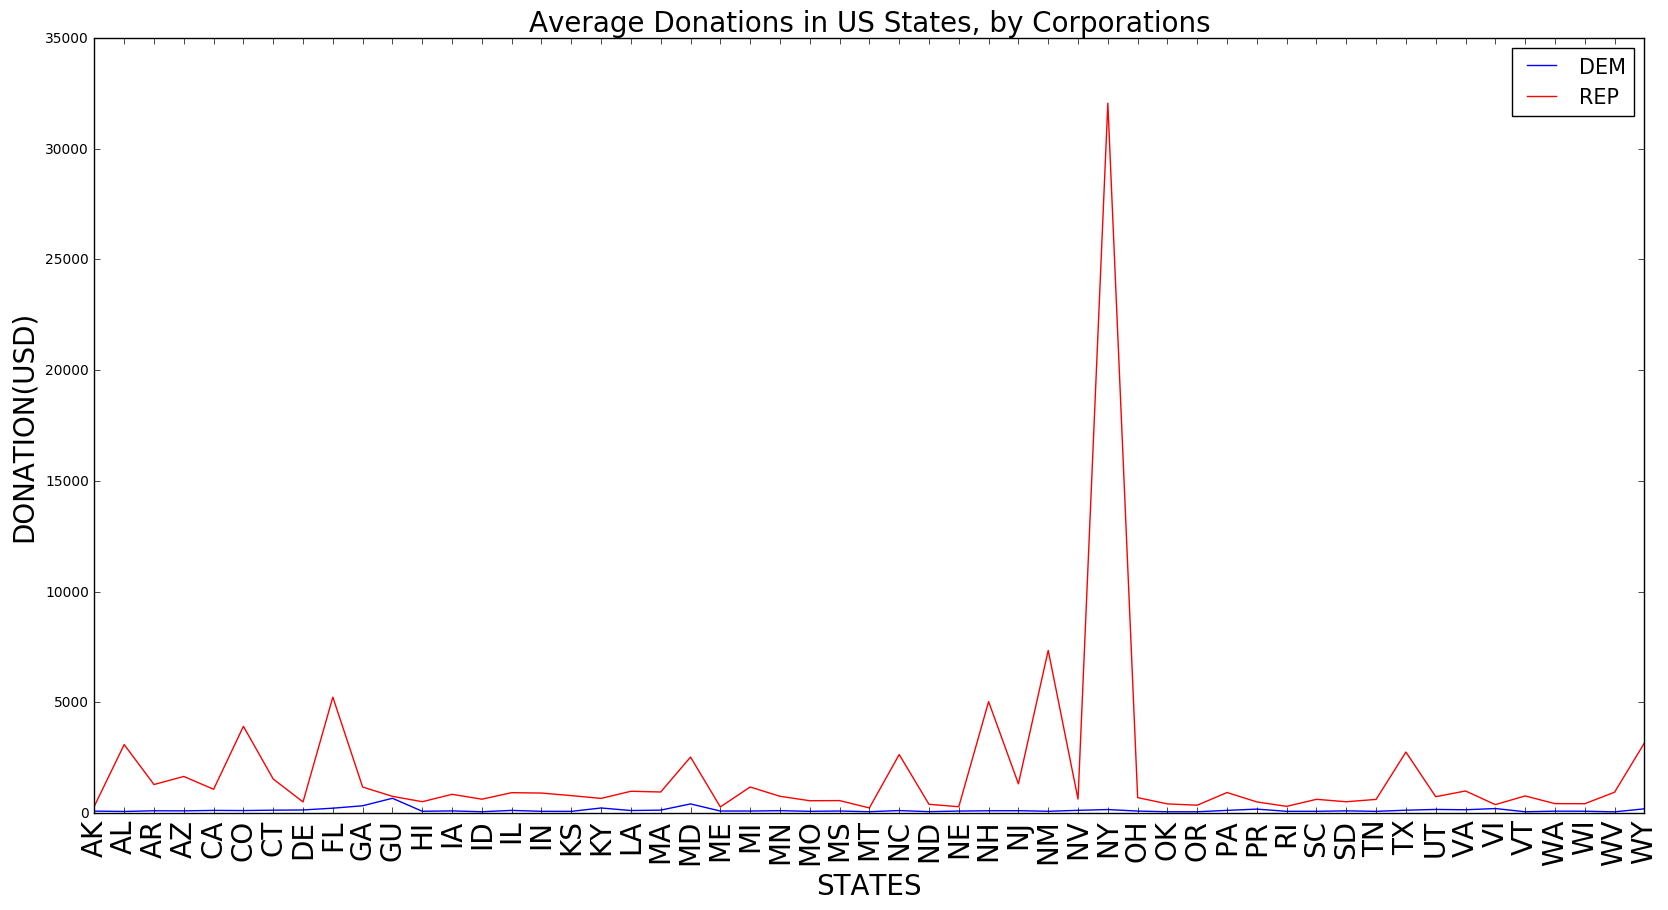

In [27]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_state_corp.mean().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_state_corp.mean().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATION(USD)', fontsize = 20)
plt.title('Average Donations in US States, by Corporations', fontsize=20)

The average donations by corporations to Republican party candidates, is higher by orders of magnitude than their Democratic counterparts.

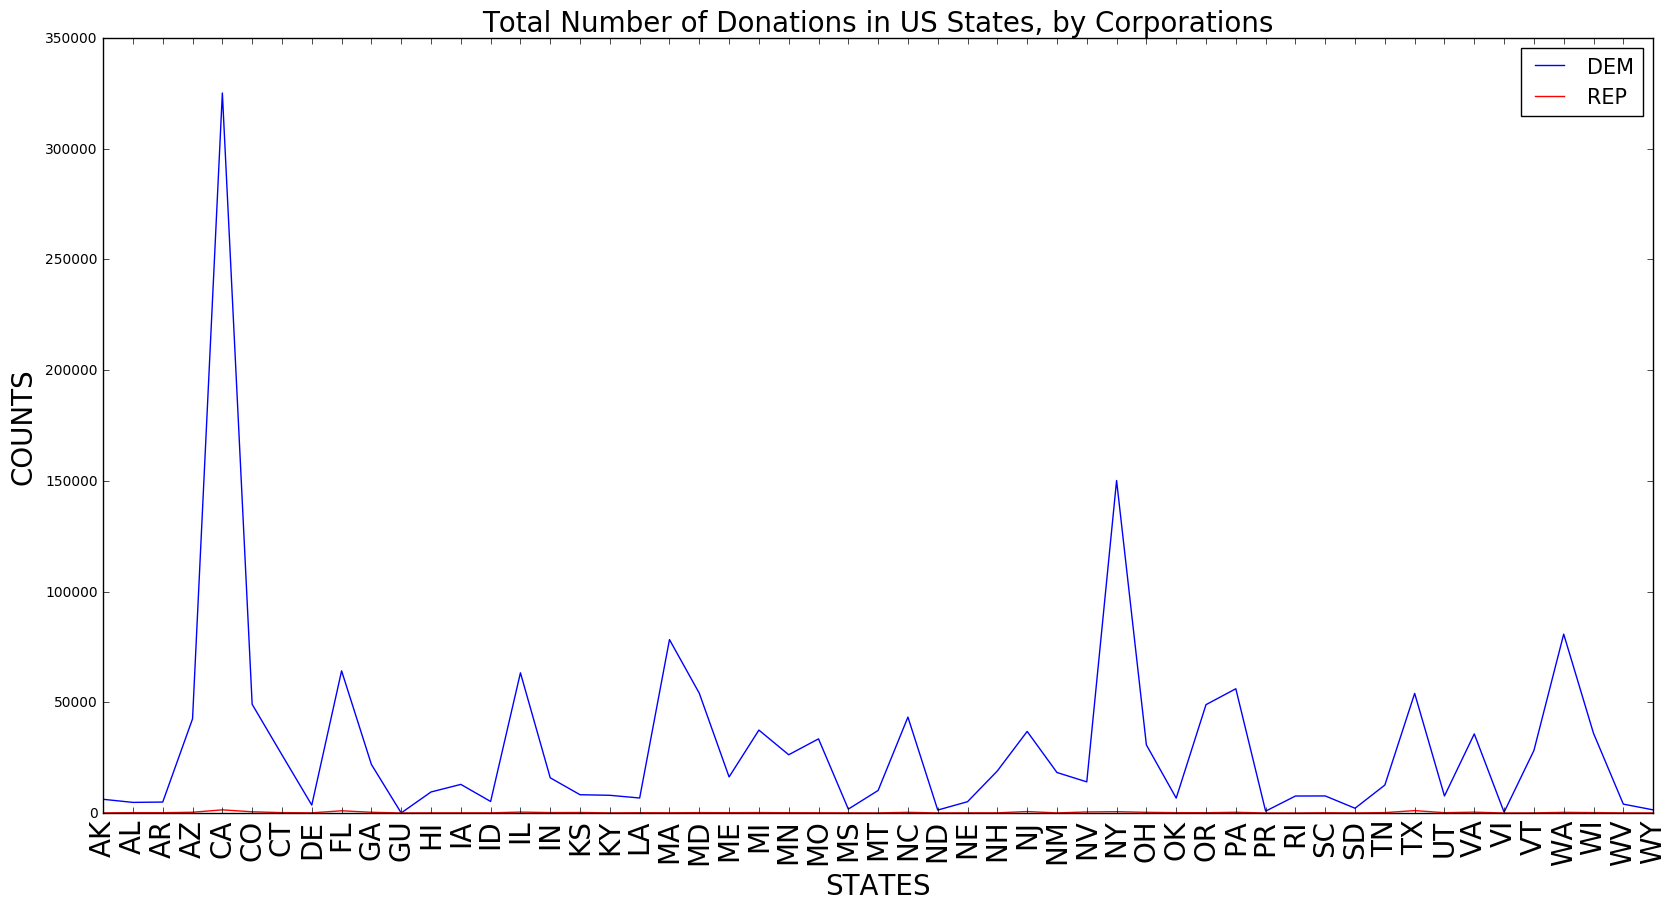

In [28]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_state_corp.count().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_state_corp.count().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States, by Corporations', fontsize=20)

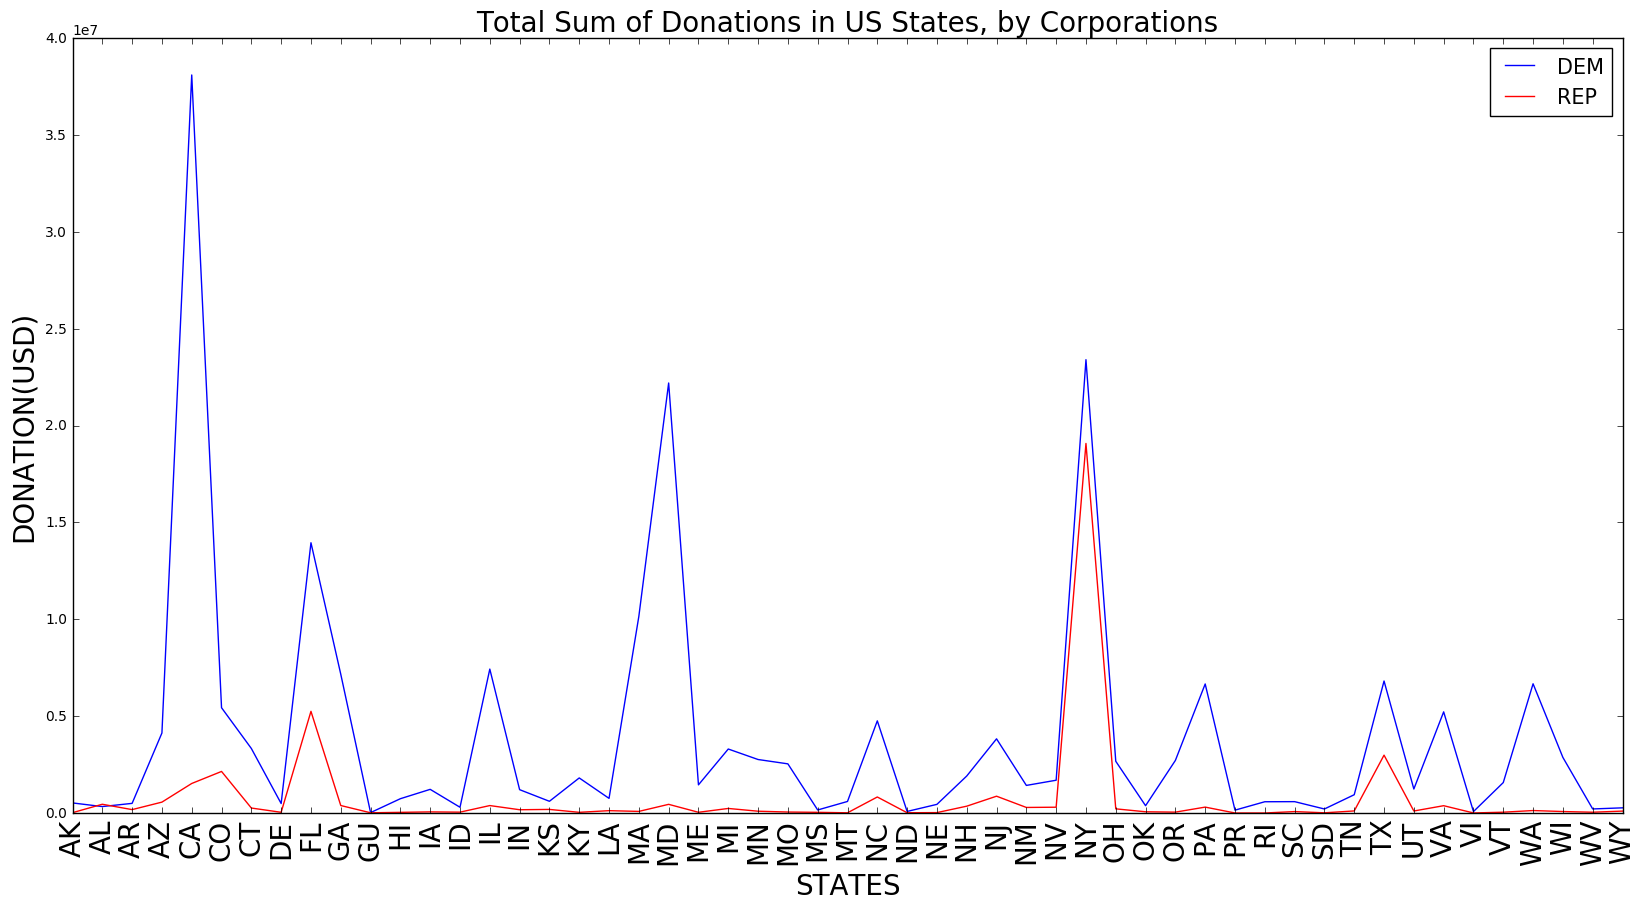

In [29]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_state_corp.sum().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_state_corp.sum().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATION(USD)', fontsize = 20)
plt.title('Total Sum of Donations in US States, by Corporations', fontsize=20)

### first 9 months (Nov. 2015- July 2016) and last 3 months (Aug. 2016- Election day)

In [31]:
#last 3 months of donations
df_last3 = df_don2[df_don2["TRANSACTION_DT"].apply(lambda row: True if row > pd.to_datetime('2016-07-31') else False)]

In [32]:
#first 9 months of donations
df_first9 = df_don2[df_don2["TRANSACTION_DT"].apply(lambda row: True if row < pd.to_datetime('2016-07-31') else False)]

In [37]:
# now we group df by state and party
df_grp_last3 = df_last3.groupby(["CAND_PTY_AFFILIATION", "STATE"])
df_grp_first9 = df_first9.groupby(["CAND_PTY_AFFILIATION", "STATE"])

### mean donation comparisons within each party

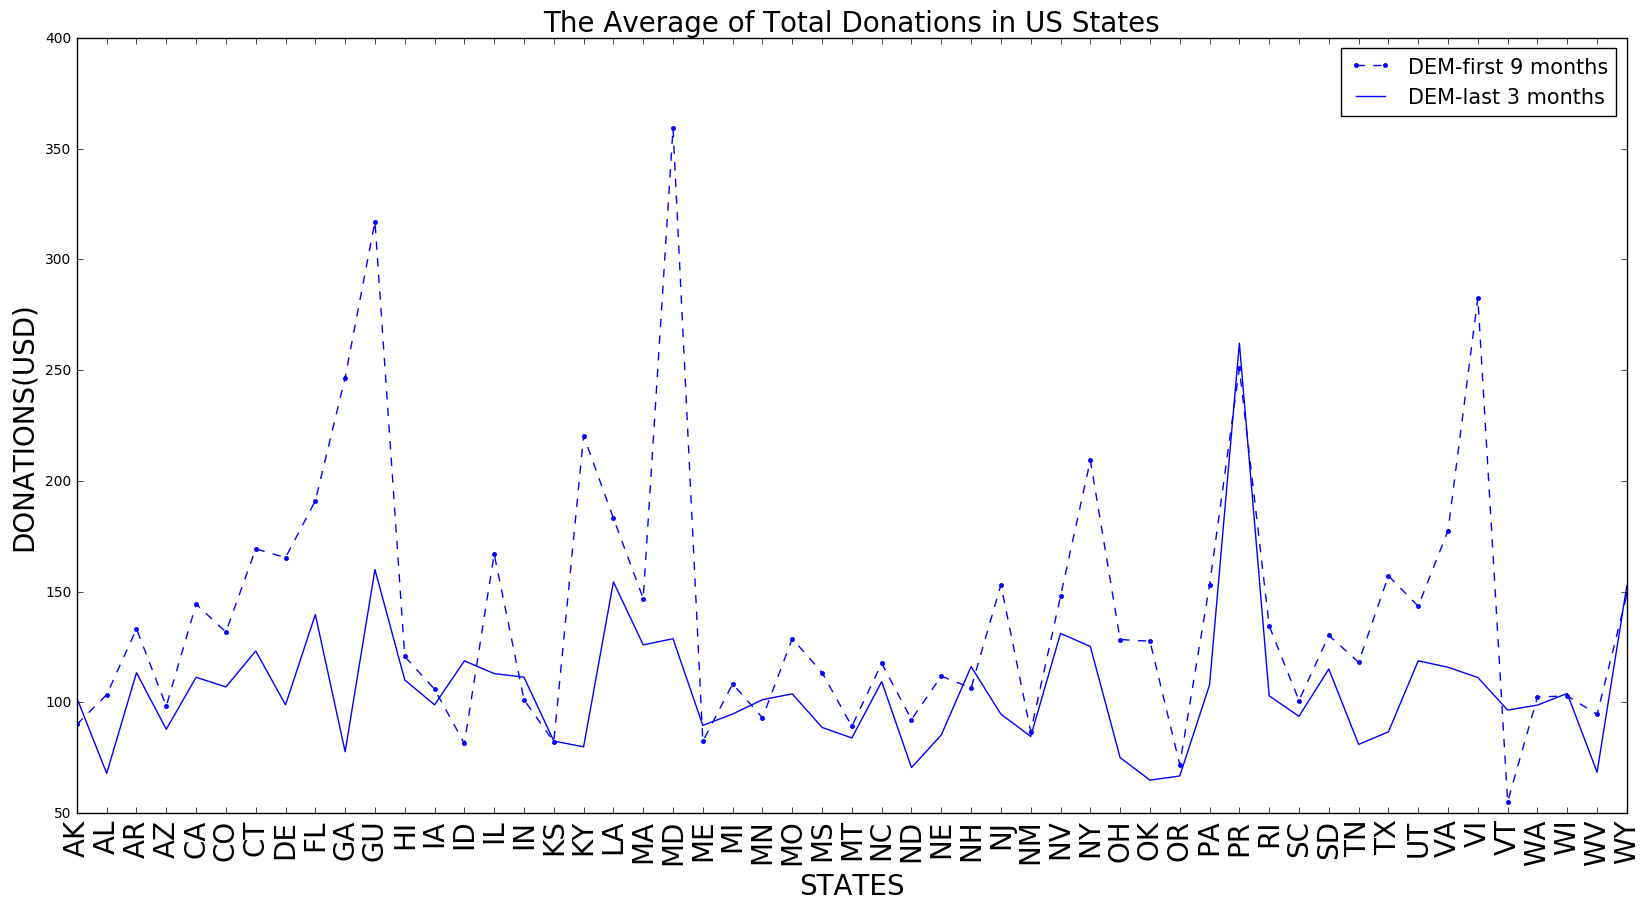

In [42]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9.mean().unstack().ix["DEM",:53]), '.--b',label='DEM-first 9 months')
plt.plot(np.array(df_grp_last3.mean().unstack().ix["DEM",:53]), 'b',label='DEM-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Average of Total Donations in US States', fontsize=20)

The dashed lines refers to donations in the first 9 months and solid months denote the last 3 months donations. As it can be inferred from the plot, in most of the states, the average donations to Democrats have dropped in the last 3 months.

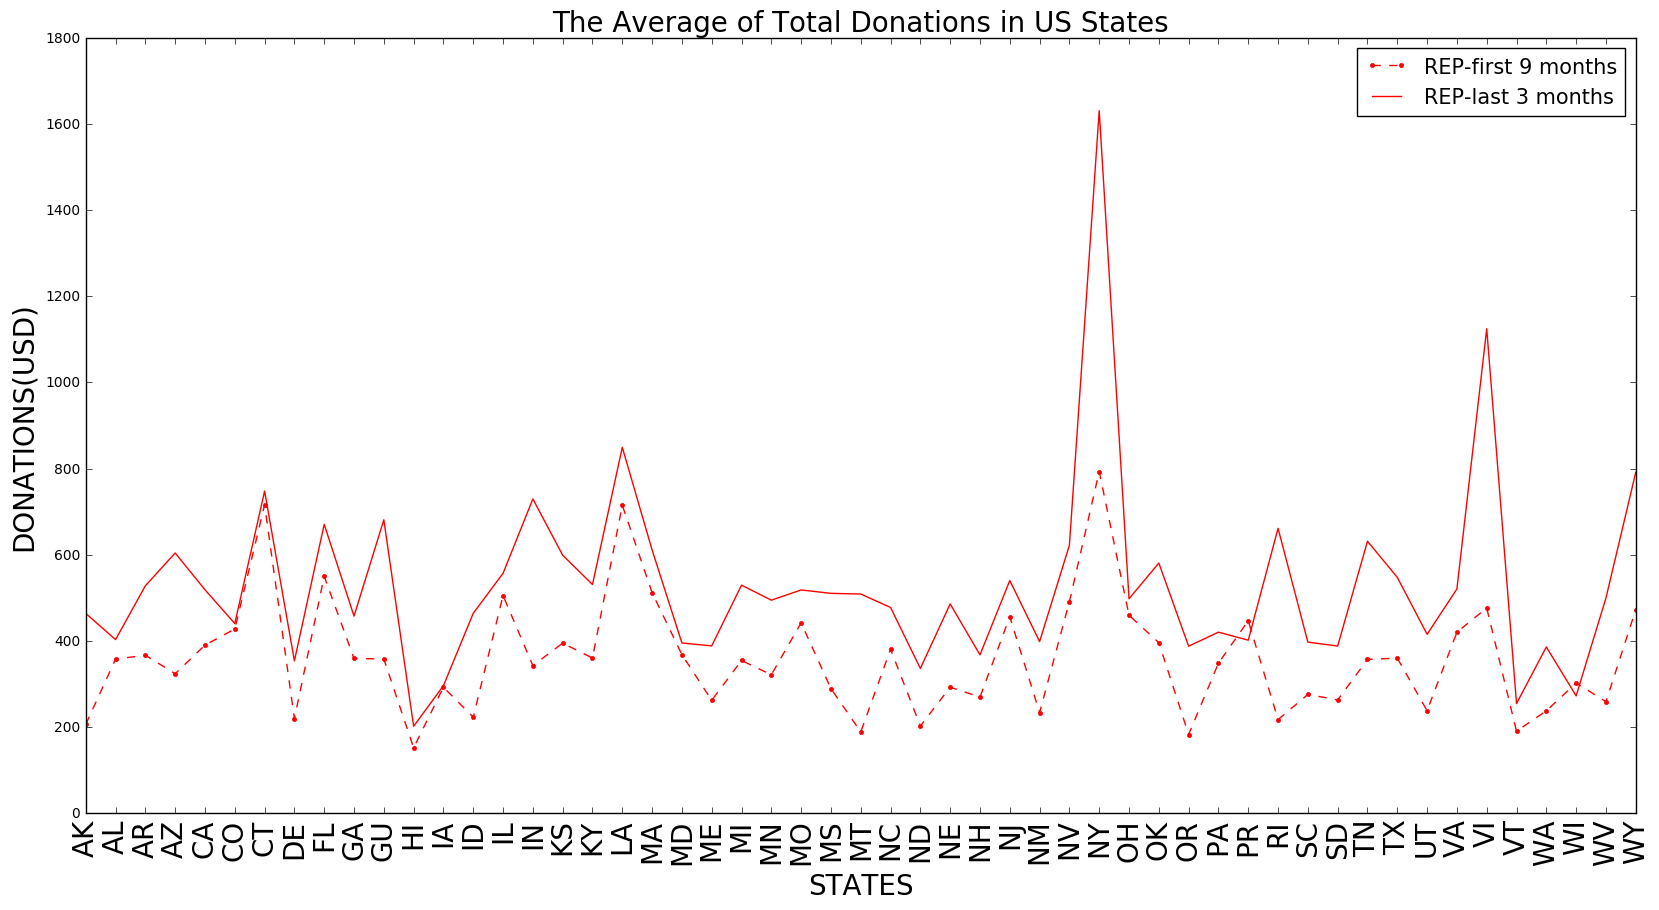

In [43]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9.mean().unstack().ix["REP",:53]),'.--r', label='REP-first 9 months')
plt.plot(np.array(df_grp_last3.mean().unstack().ix["REP",:53]),'r', label='REP-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Average of Total Donations in US States', fontsize=20)

As it can be inferred from this plot, in most of the states, the average donations to Republicans have raised in the last 3 months.

### total number of donations, within eah party

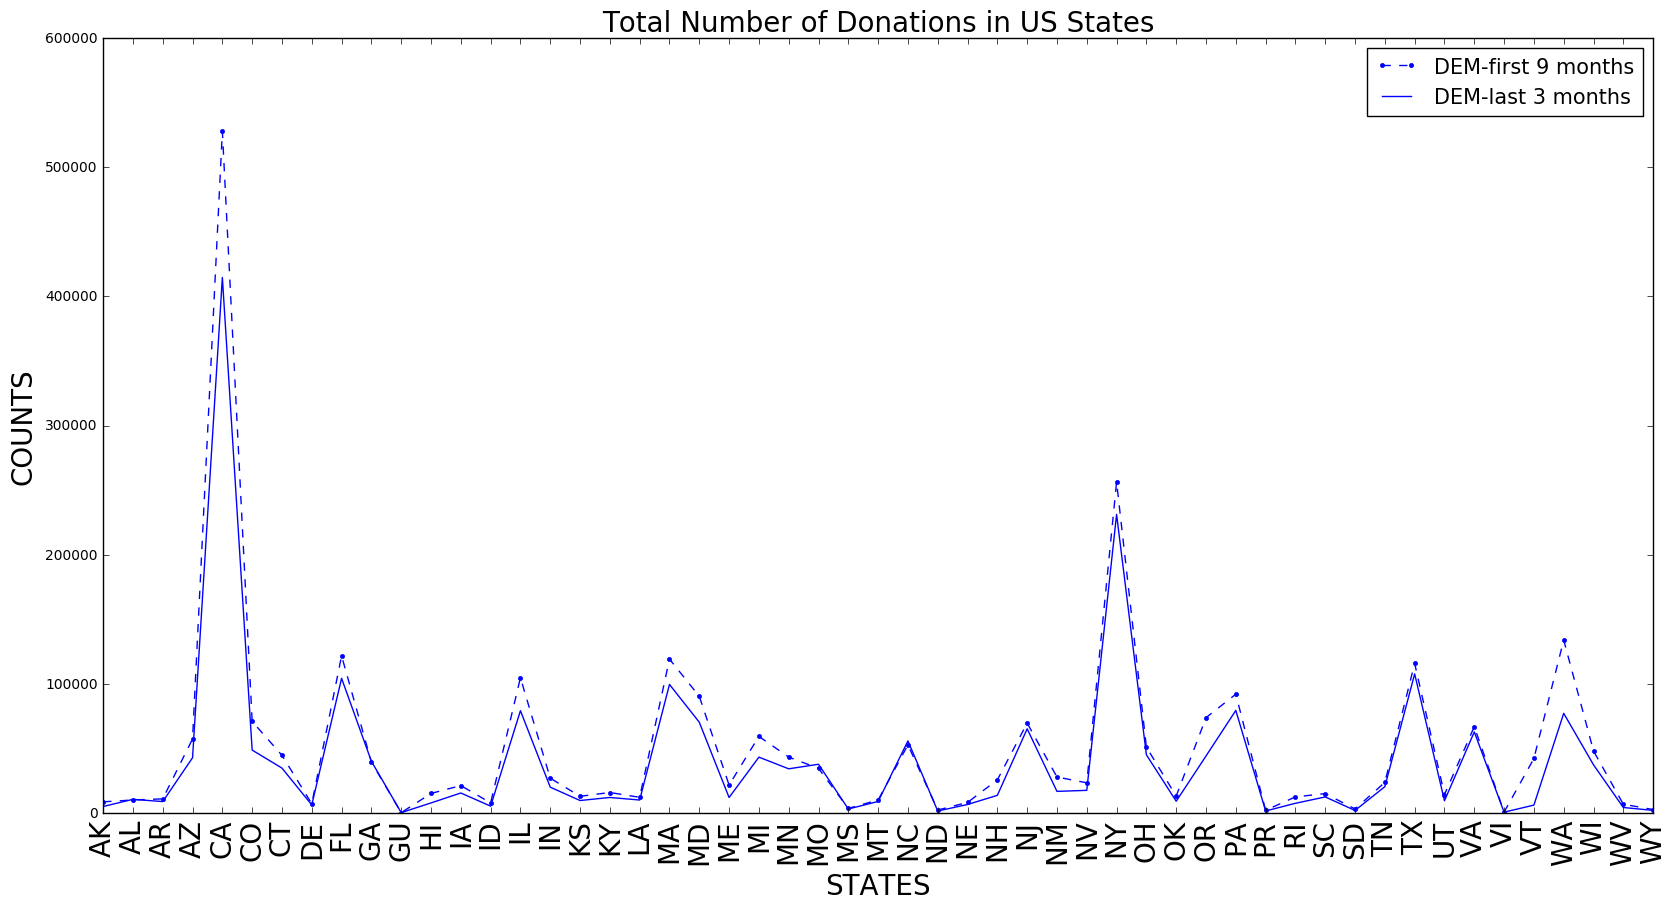

In [48]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9.count().unstack().ix["DEM",:53]), '.--b',label='DEM-first 9 months')
plt.plot(np.array(df_grp_last3.count().unstack().ix["DEM",:53]), 'b',label='DEM-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States', fontsize=20)

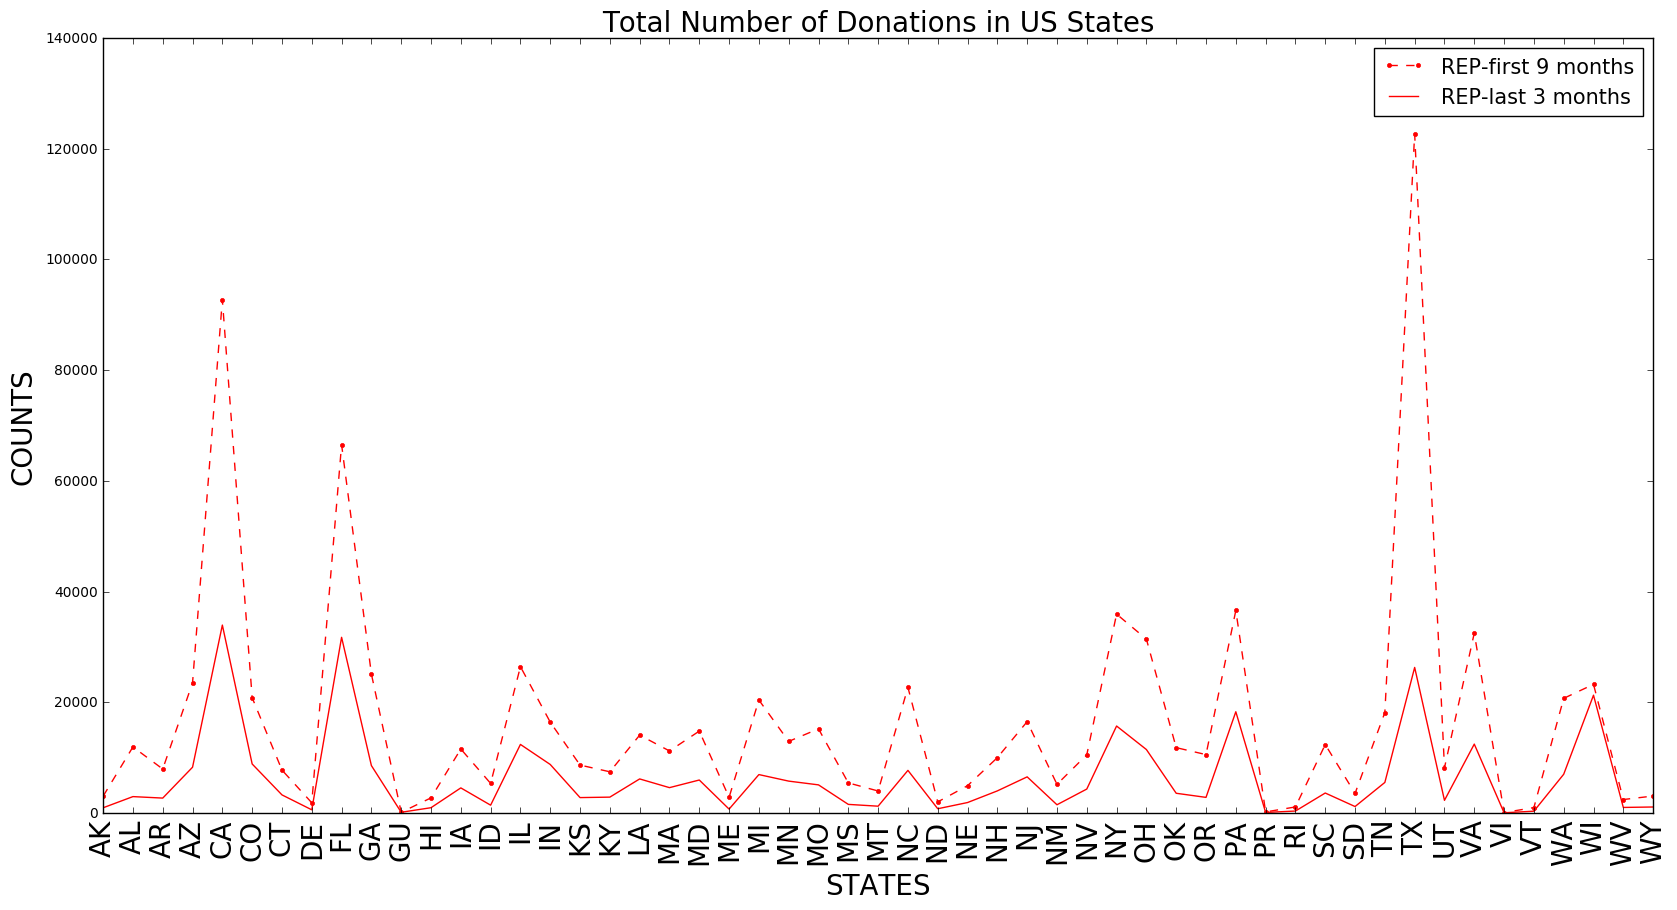

In [49]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9.count().unstack().ix["REP",:53]),'.--r', label='REP-first 9 months')
plt.plot(np.array(df_grp_last3.count().unstack().ix["REP",:53]),'r', label='REP-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States', fontsize=20)

In the above two plots, the number of donations in two durations have been compared, and because the length of the durations are not the same and number of counts is an unnormalized feature, and also the last 3 months are more important, I cannot draw any strong conclusion.

### total donations comparison within each party

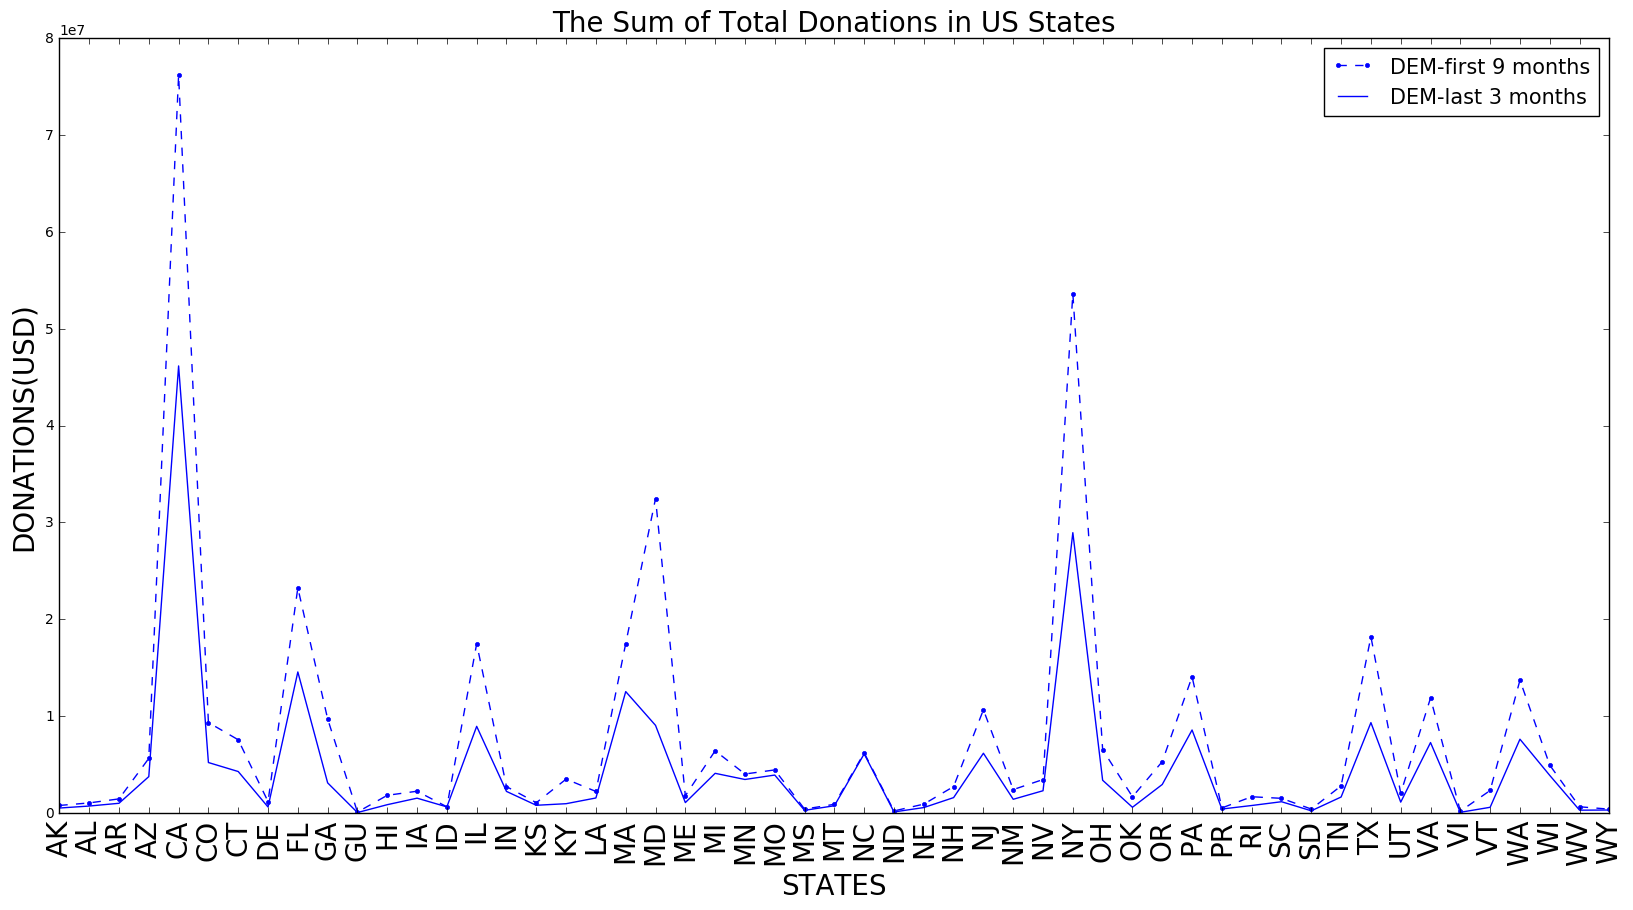

In [50]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9.sum().unstack().ix["DEM",:53]), '.--b',label='DEM-first 9 months')
plt.plot(np.array(df_grp_last3.sum().unstack().ix["DEM",:53]), 'b',label='DEM-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Sum of Total Donations in US States', fontsize=20)

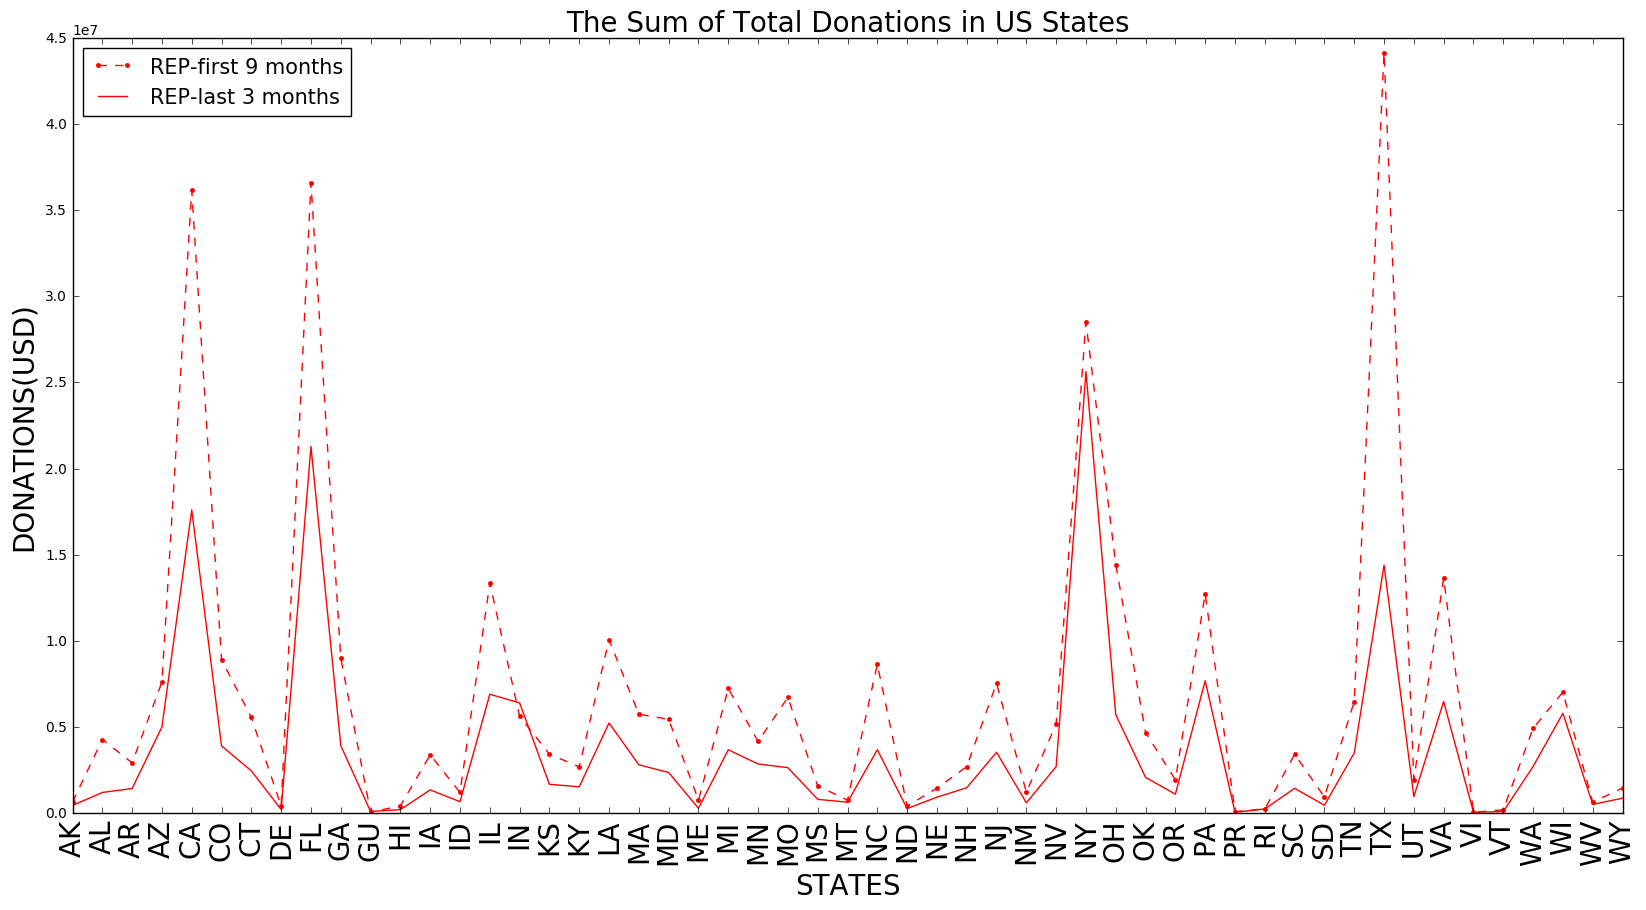

In [51]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9.sum().unstack().ix["REP",:53]),'.--r', label='REP-first 9 months')
plt.plot(np.array(df_grp_last3.sum().unstack().ix["REP",:53]),'r', label='REP-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Sum of Total Donations in US States', fontsize=20)

### Individual donations

In [52]:
df5 = df_first9[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT", "OTHER_ID"]]
df5 = df5[df5["OTHER_ID"] == 0]
df5 = df5[["STATE", "CAND_PTY_AFFILIATION", "TRANSACTION_AMT"]]
df_grp_first9_ind = df5.groupby(["CAND_PTY_AFFILIATION", "STATE"])

In [53]:
df6 = df_last3[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT", "OTHER_ID"]]
df6 = df6[df6["OTHER_ID"] == 0]
df6 = df6[["STATE", "CAND_PTY_AFFILIATION", "TRANSACTION_AMT"]]
df_grp_last3_ind = df6.groupby(["CAND_PTY_AFFILIATION", "STATE"])

### mean donation comparisons within each party

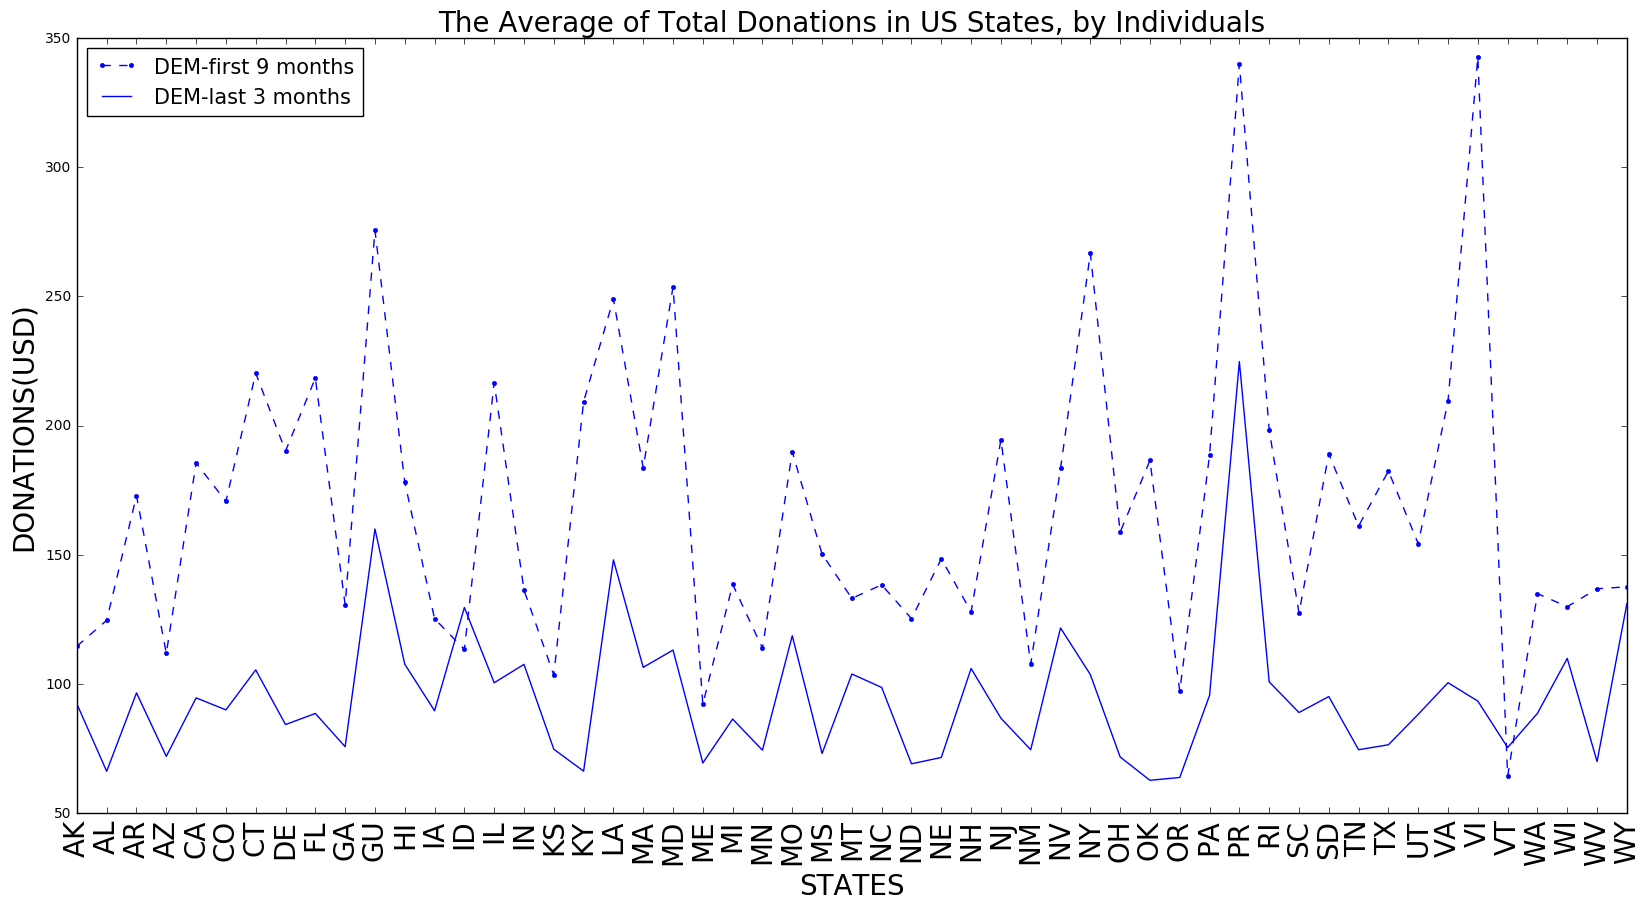

In [54]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_ind.mean().unstack().ix["DEM",:53]), '.--b',label='DEM-first 9 months')
plt.plot(np.array(df_grp_last3_ind.mean().unstack().ix["DEM",:53]), 'b',label='DEM-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Average of Total Donations in US States, by Individuals', fontsize=20)

again for the Democratic party we see the same trend in most of states, and the average donations by individuals have dropped in last 3 months.

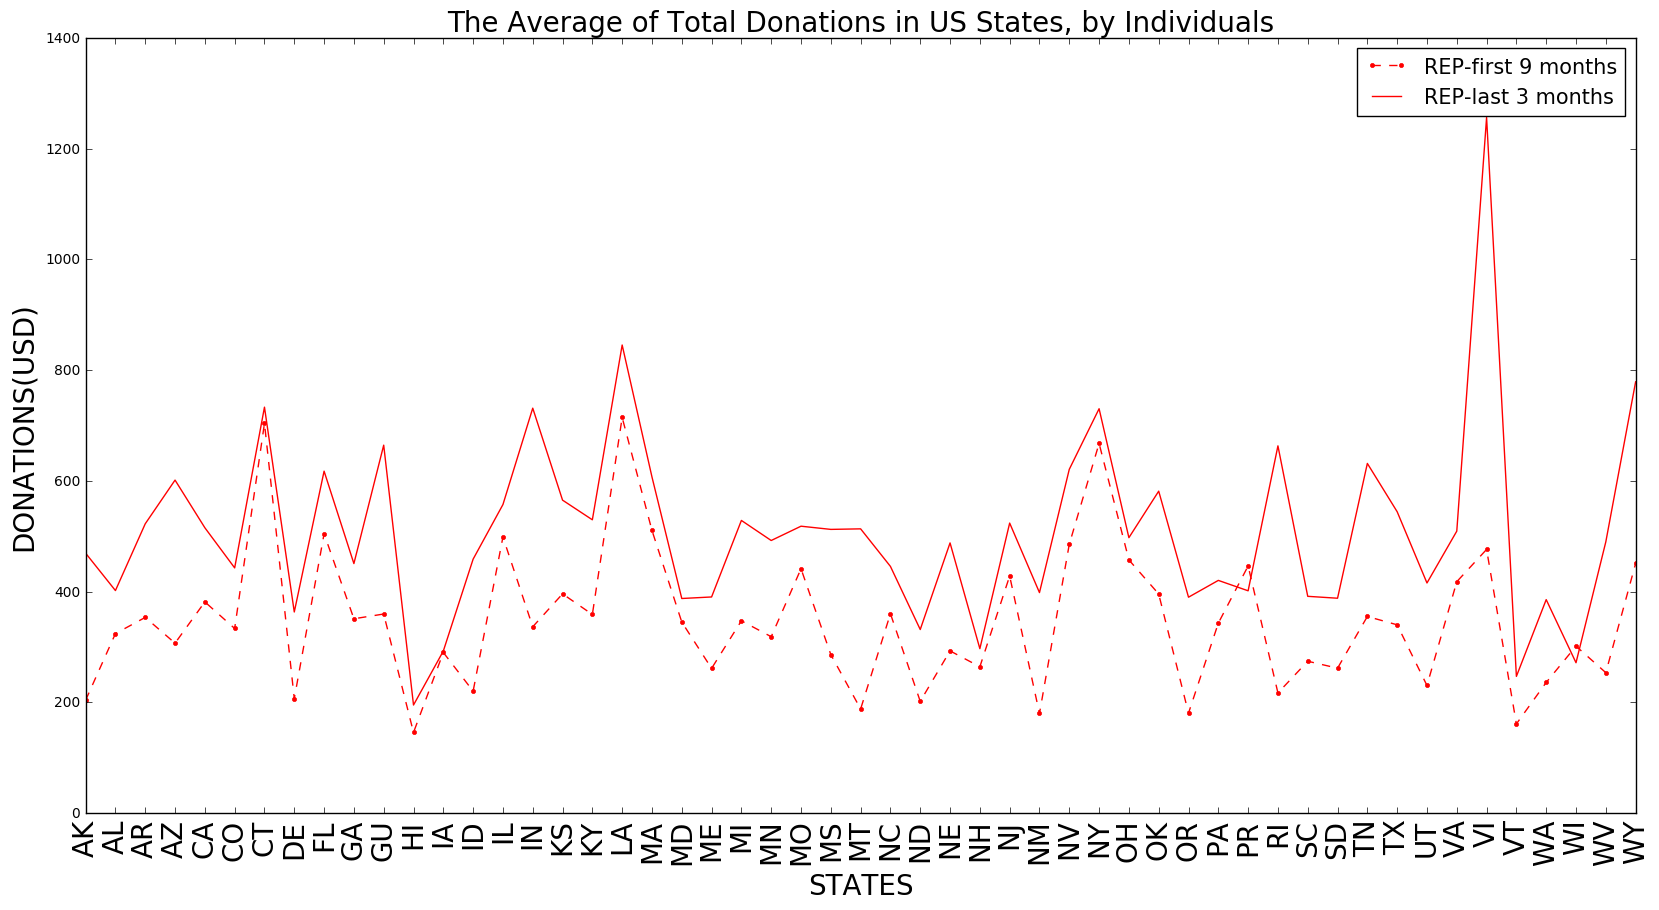

In [55]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_ind.mean().unstack().ix["REP",:53]),'.--r', label='REP-first 9 months')
plt.plot(np.array(df_grp_last3_ind.mean().unstack().ix["REP",:53]),'r', label='REP-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Average of Total Donations in US States, by Individuals', fontsize=20)

Conversely, the behavior by individual Republicans is quite different in most of the states, and the average donations have been increased in the last 3 months.

### total number of donations, within eah party

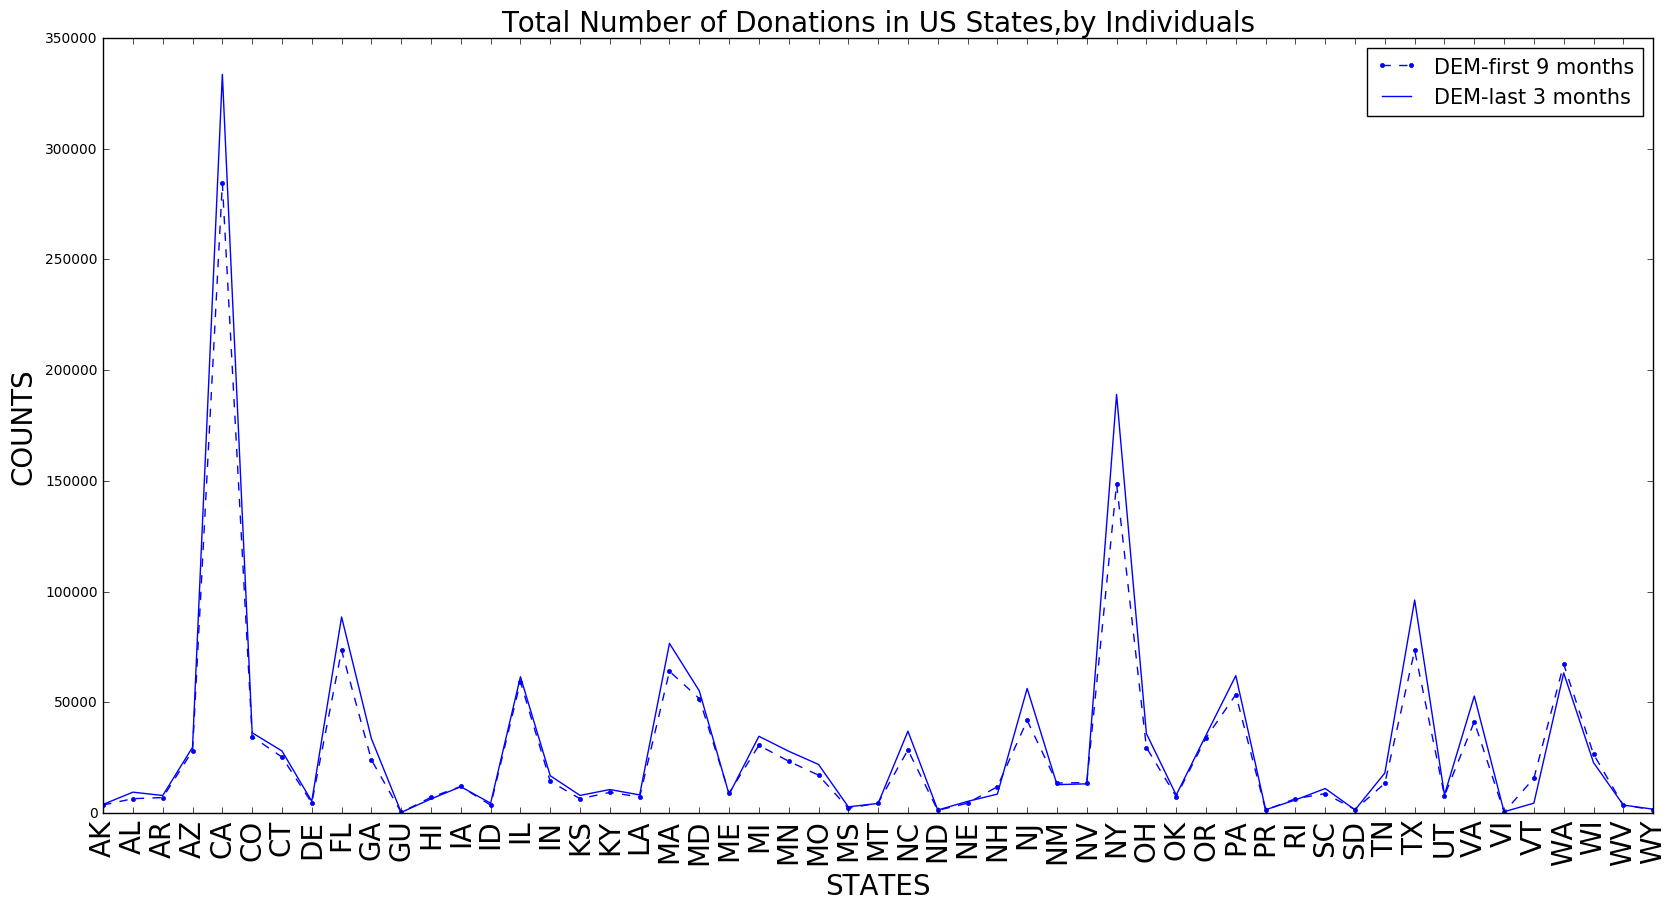

In [56]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_ind.count().unstack().ix["DEM",:53]), '.--b',label='DEM-first 9 months')
plt.plot(np.array(df_grp_last3_ind.count().unstack().ix["DEM",:53]), 'b',label='DEM-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States,by Individuals', fontsize=20)

Quite surprisingly, the number of donations to Democratic party candidates by individuals are slightly higher in the last 3 months in most of the states.

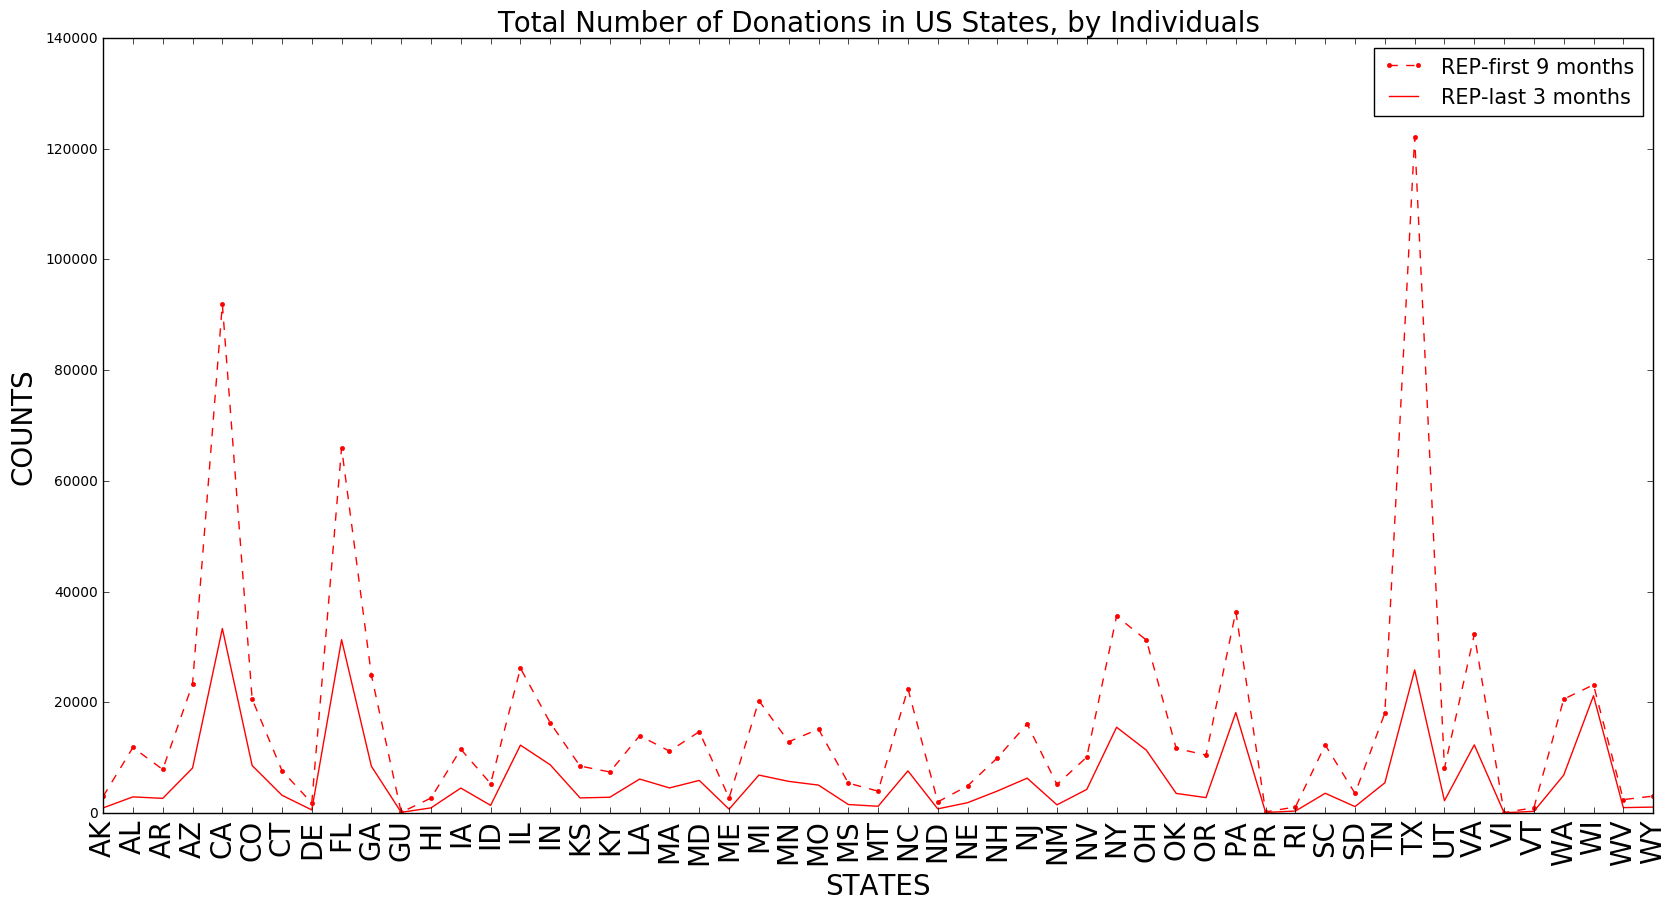

In [57]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_ind.count().unstack().ix["REP",:53]),'.--r', label='REP-first 9 months')
plt.plot(np.array(df_grp_last3_ind.count().unstack().ix["REP",:53]),'r', label='REP-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States, by Individuals', fontsize=20)

### total donations comparison within each party

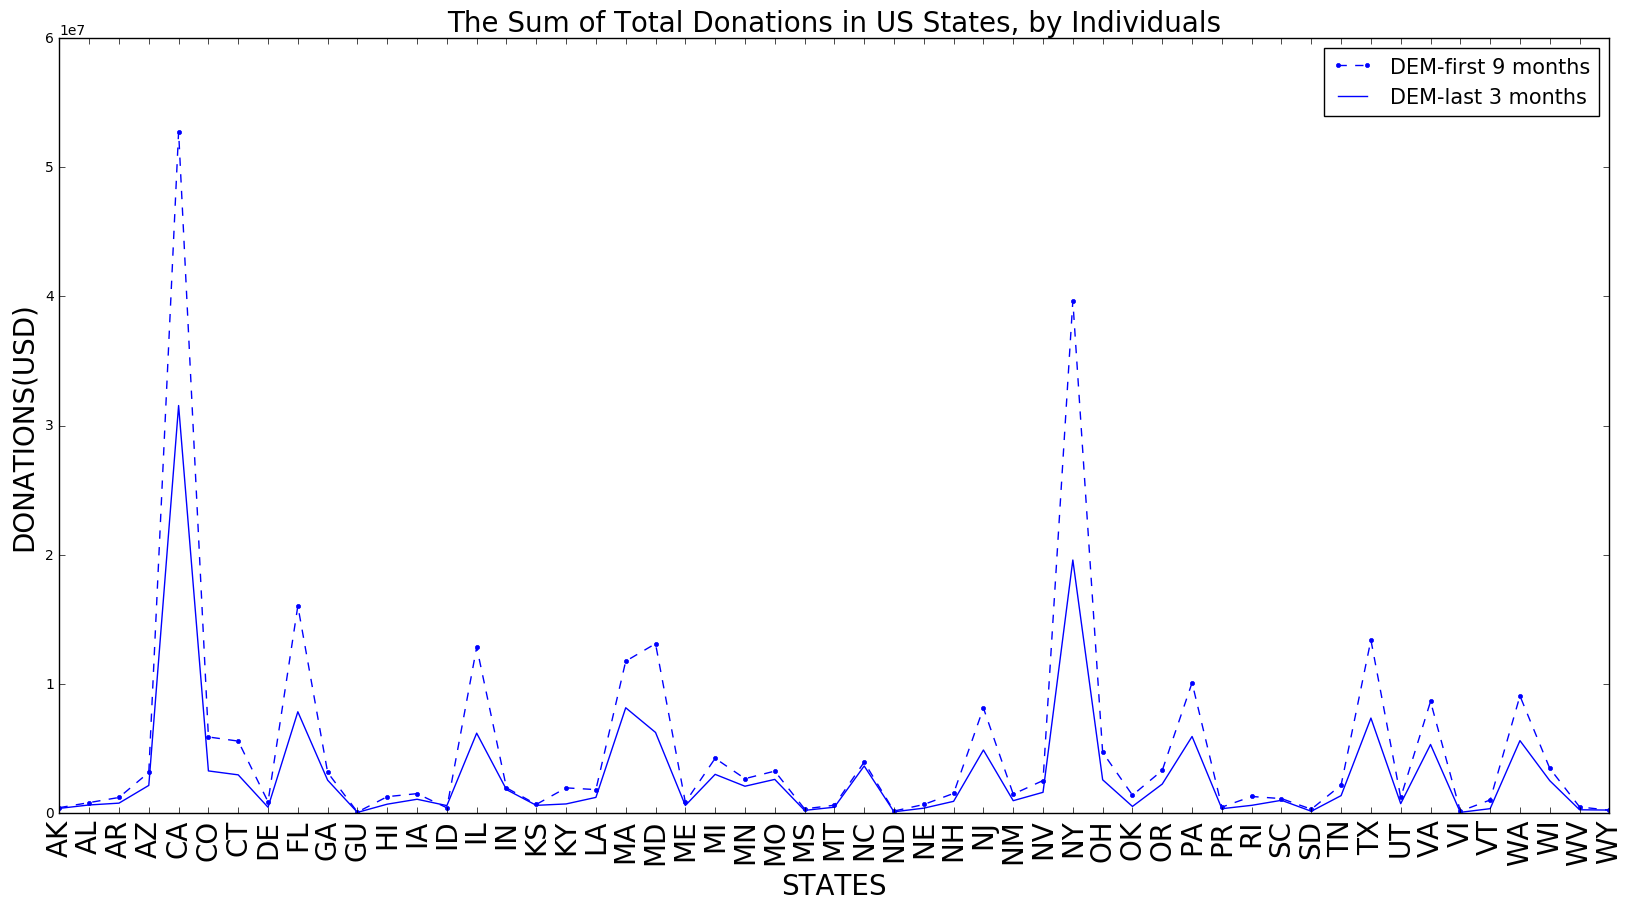

In [58]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_ind.sum().unstack().ix["DEM",:53]), '.--b',label='DEM-first 9 months')
plt.plot(np.array(df_grp_last3_ind.sum().unstack().ix["DEM",:53]), 'b',label='DEM-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Sum of Total Donations in US States, by Individuals', fontsize=20)

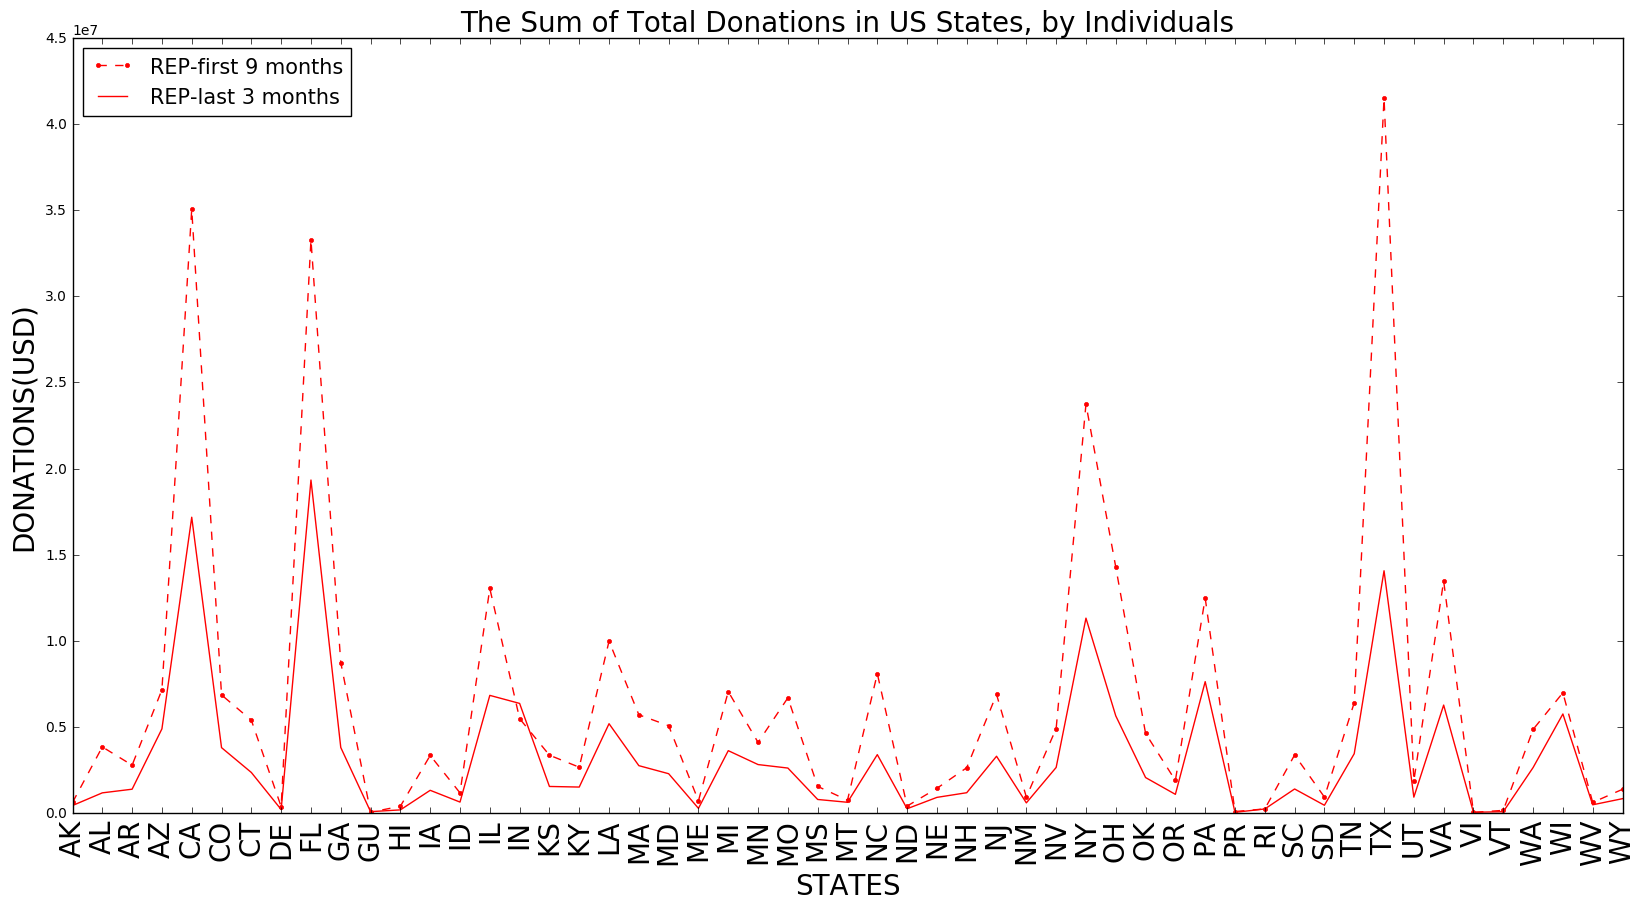

In [59]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_ind.sum().unstack().ix["REP",:53]),'.--r', label='REP-first 9 months')
plt.plot(np.array(df_grp_last3_ind.sum().unstack().ix["REP",:53]),'r', label='REP-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Sum of Total Donations in US States, by Individuals', fontsize=20)

### By Corporations

In [60]:
df7 = df_first9[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT", "OTHER_ID"]]
df7 = df7[df7["OTHER_ID"] == 1]
df7 = df7[["STATE", "CAND_PTY_AFFILIATION", "TRANSACTION_AMT"]]
df_grp_first9_corp = df7.groupby(["CAND_PTY_AFFILIATION", "STATE"])

In [61]:
df8 = df_last3[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT", "OTHER_ID"]]
df8 = df8[df8["OTHER_ID"] == 1]
df8 = df8[["STATE", "CAND_PTY_AFFILIATION", "TRANSACTION_AMT"]]
df_grp_last3_corp = df8.groupby(["CAND_PTY_AFFILIATION", "STATE"])

### mean donation comparisons within each party

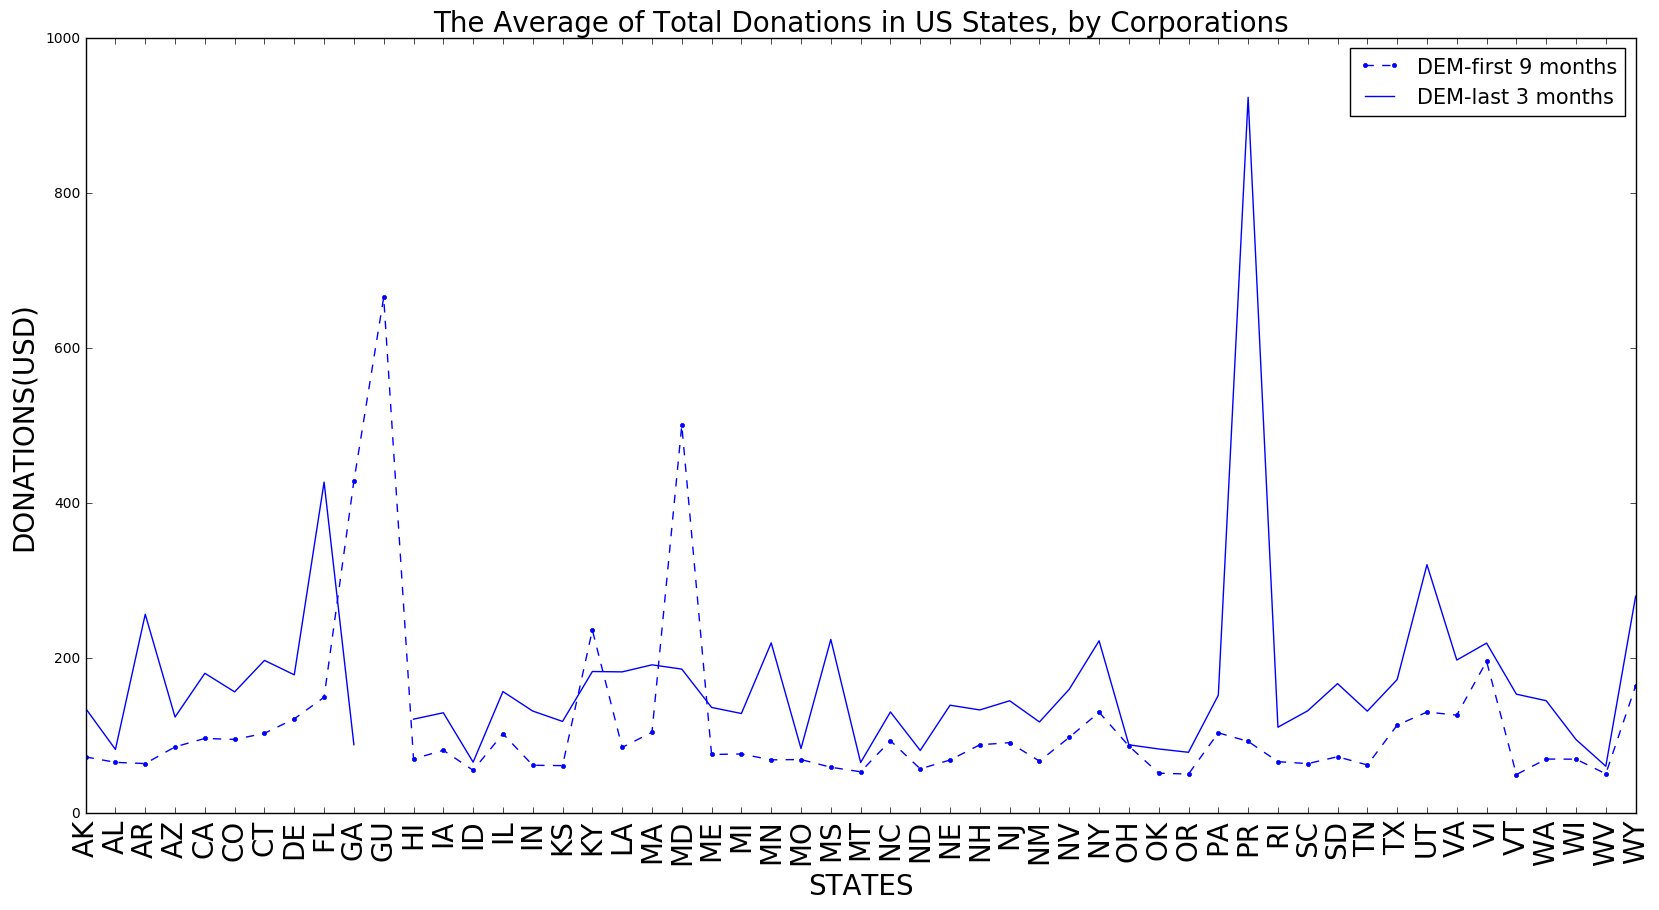

In [62]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_corp.mean().unstack().ix["DEM",:53]), '.--b',label='DEM-first 9 months')
plt.plot(np.array(df_grp_last3_corp.mean().unstack().ix["DEM",:53]), 'b',label='DEM-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Average of Total Donations in US States, by Corporations', fontsize=20)

In some states, the average donations by corporations to Democratic party has increased in the last 3 months.

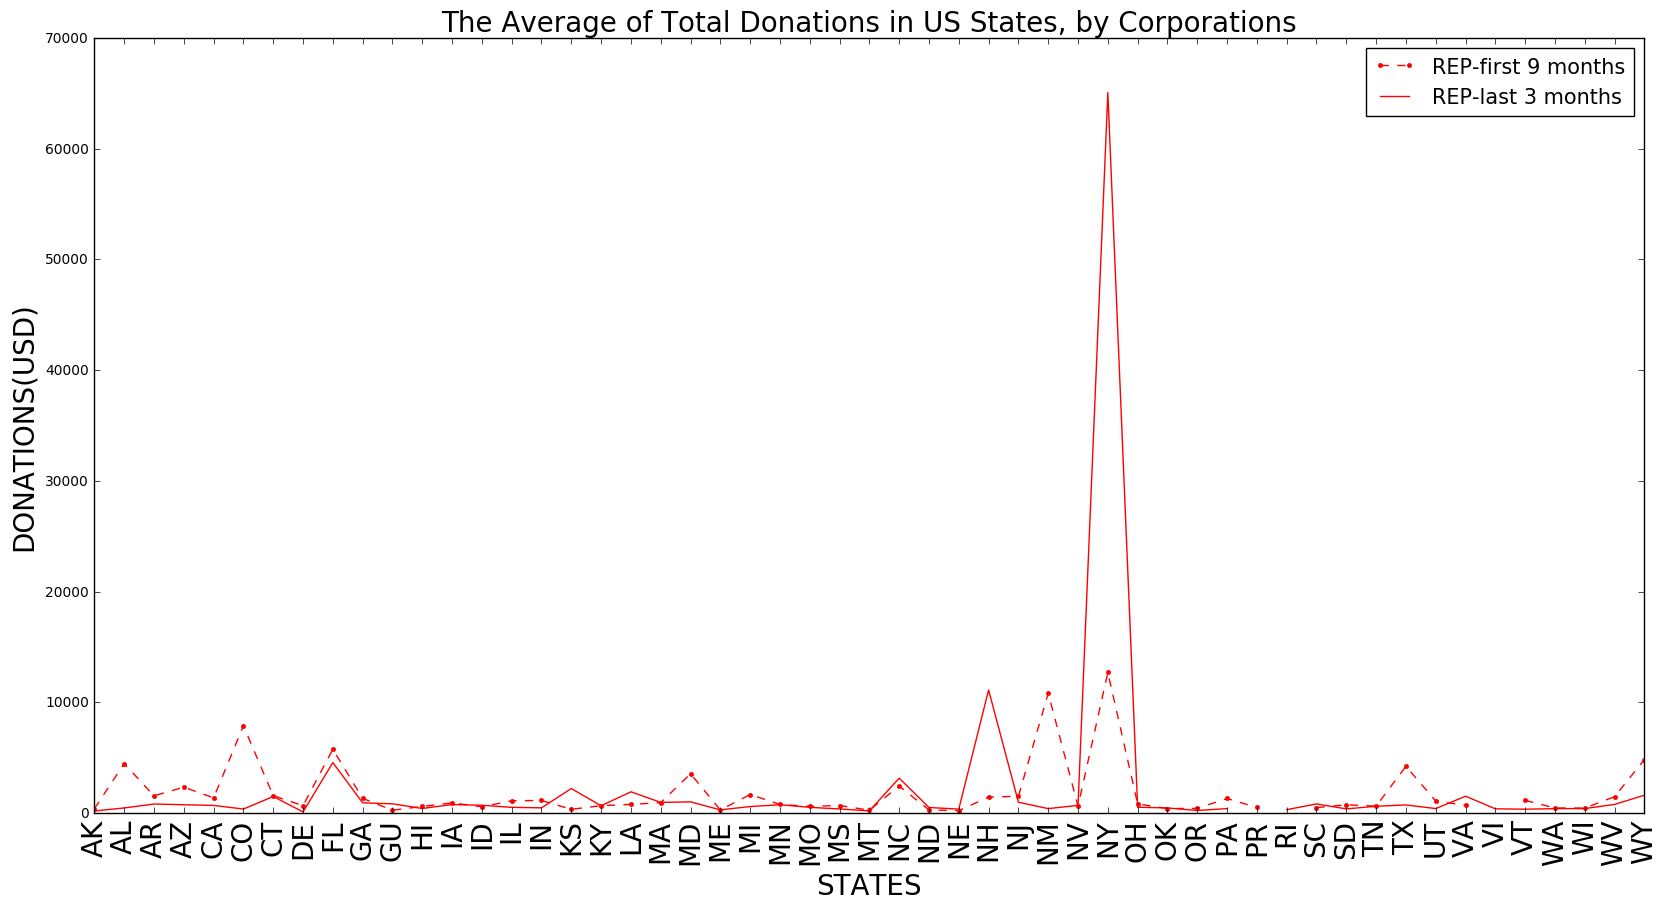

In [63]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_corp.mean().unstack().ix["REP",:53]),'.--r', label='REP-first 9 months')
plt.plot(np.array(df_grp_last3_corp.mean().unstack().ix["REP",:53]),'r', label='REP-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Average of Total Donations in US States, by Corporations', fontsize=20)

There is a clear peak in donations by the corporations to Republican candidates in the state of New York in the last 3 months.

### total number of donations, within eah party

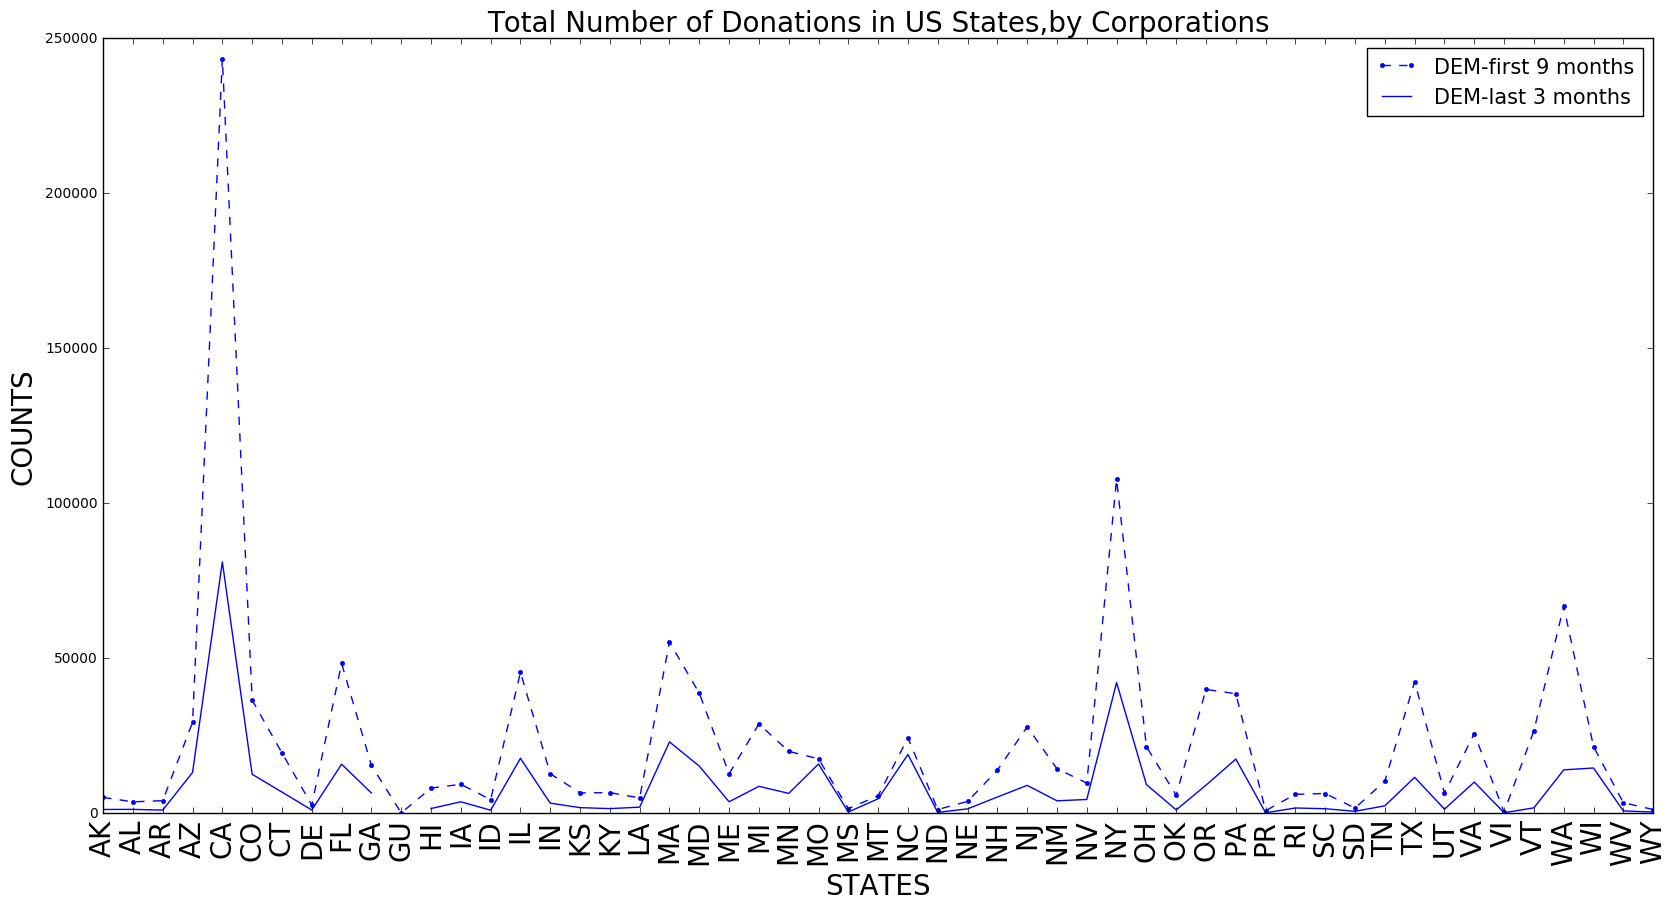

In [65]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_corp.count().unstack().ix["DEM",:53]), '.--b',label='DEM-first 9 months')
plt.plot(np.array(df_grp_last3_corp.count().unstack().ix["DEM",:53]), 'b',label='DEM-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States,by Corporations', fontsize=20)

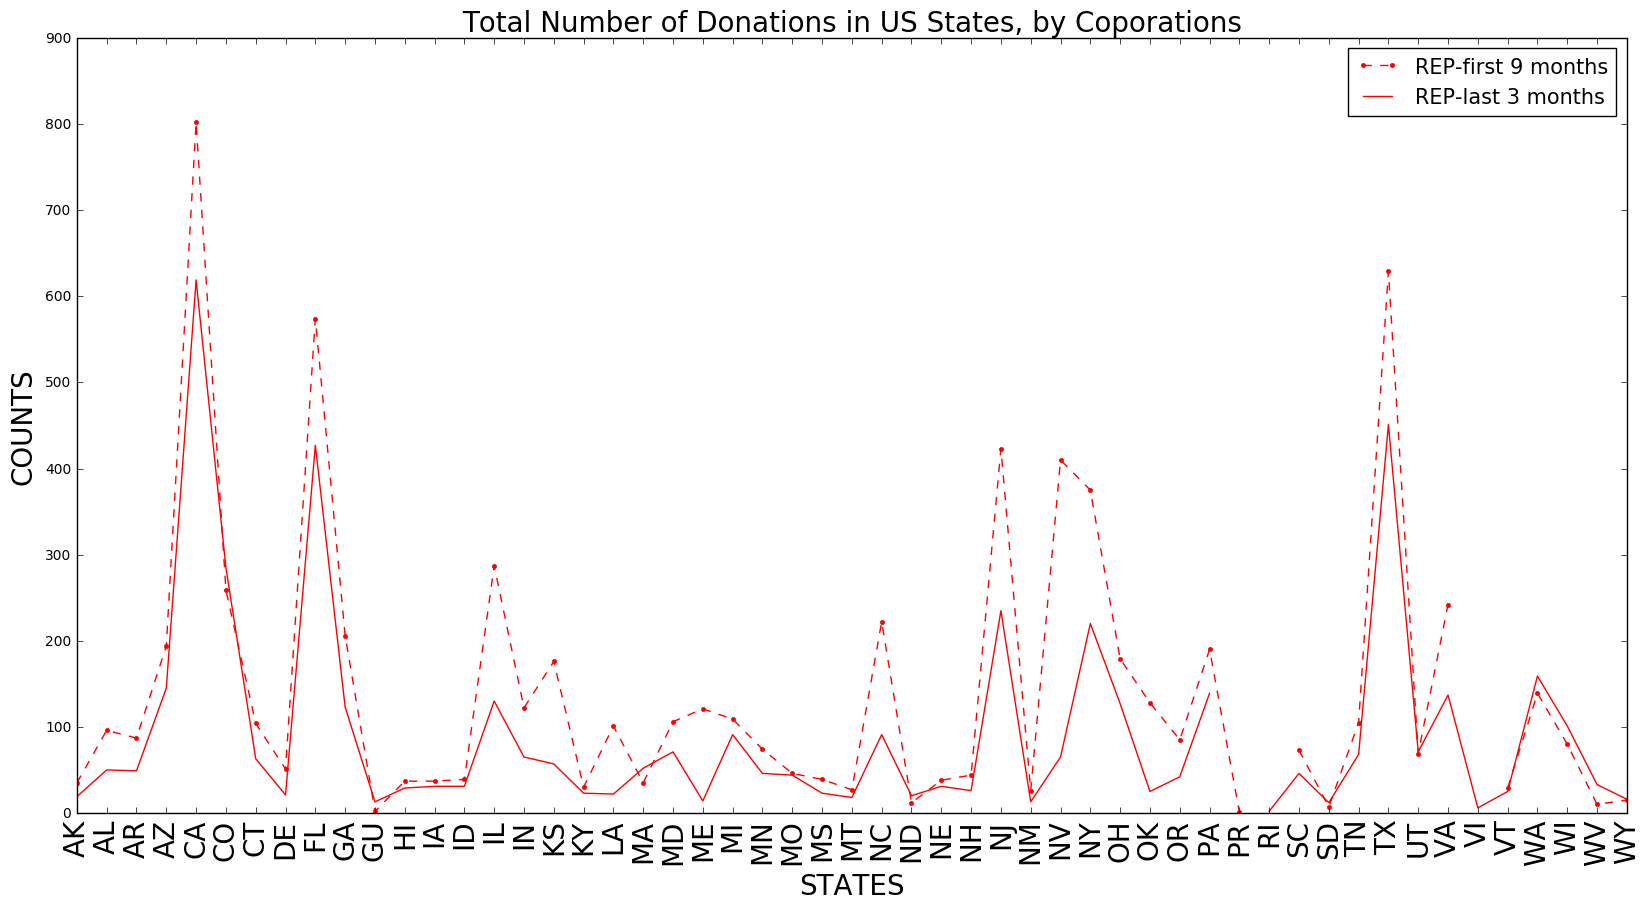

In [64]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_corp.count().unstack().ix["REP",:53]),'.--r', label='REP-first 9 months')
plt.plot(np.array(df_grp_last3_corp.count().unstack().ix["REP",:53]),'r', label='REP-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States, by Coporations', fontsize=20)

### total donations comparison within each party

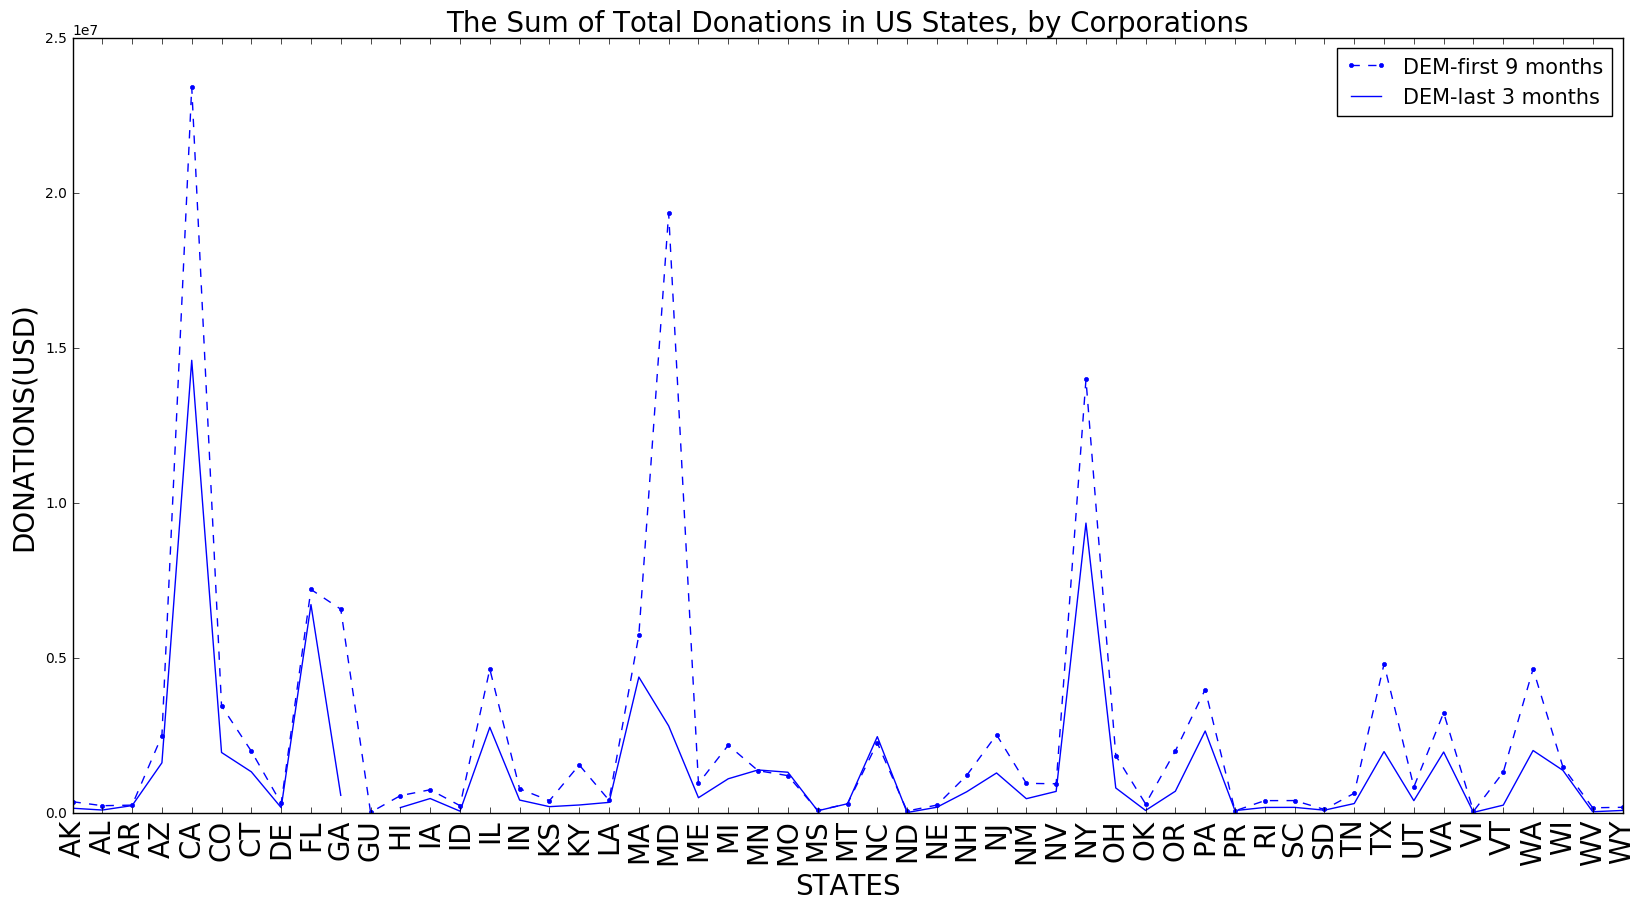

In [68]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_corp.sum().unstack().ix["DEM",:53]), '.--b',label='DEM-first 9 months')
plt.plot(np.array(df_grp_last3_corp.sum().unstack().ix["DEM",:53]), 'b',label='DEM-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Sum of Total Donations in US States, by Corporations', fontsize=20)

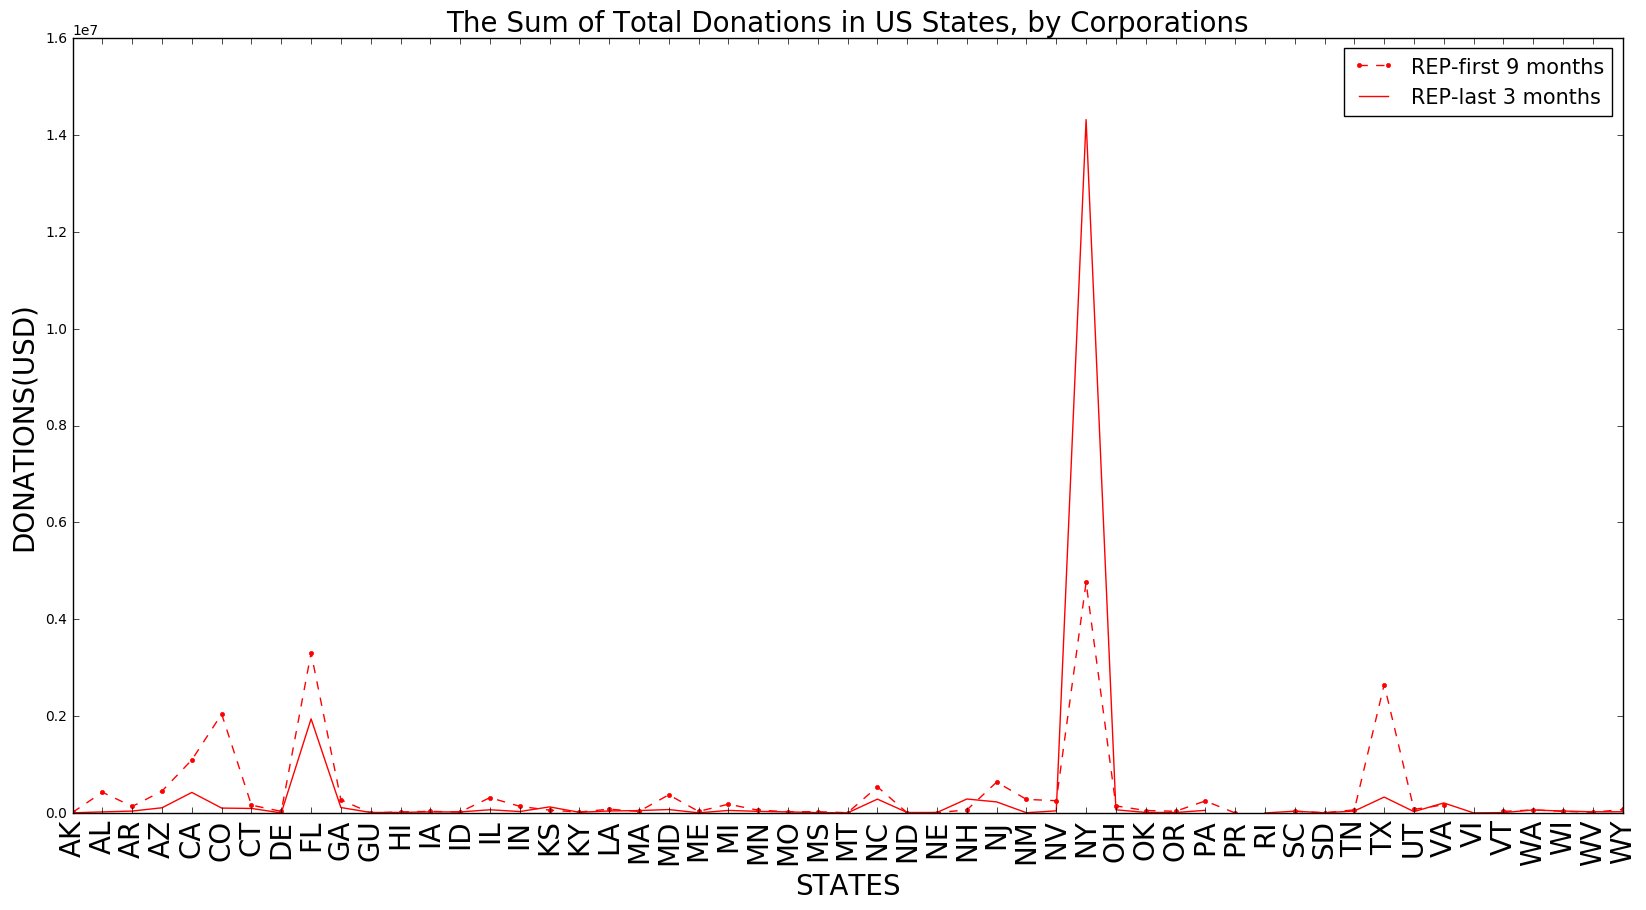

In [67]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_first9_corp.sum().unstack().ix["REP",:53]),'.--r', label='REP-first 9 months')
plt.plot(np.array(df_grp_last3_corp.sum().unstack().ix["REP",:53]),'r', label='REP-last 3 months')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Sum of Total Donations in US States, by Corporations', fontsize=20)

## Classification
Here, I use the features extracted in previous sections and try to predict the election results for the states.

### Importing necessary packages for classification task

In [144]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

/usr/programs/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/programs/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [145]:
states_voted = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
states_voted = sorted(states_voted)

I extracted the labels from website and define lables for each state.
1 means democratic party won in the state and 0 means republican party won in the state.

In [146]:
labels = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0
 , 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]

## Extracting features
First, I keep the information of 50 states which voted (I elimintated PR, GU and VI).

In [147]:
df_don_class = df_don2[df_don2["STATE"].apply(lambda row: True if row in states_voted else False)]

In [149]:
df_state_class = df_don_class[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT"]]

I group df by state and party

In [150]:
df_grp_state_class = df_state_class.groupby(["CAND_PTY_AFFILIATION", "STATE"])

### Averge donations to each party in each state
The first 50 entries correspond to the donatations to democratic party and the last 50 entries show the donation to the republican side.

In [151]:
mean_state_class = df_grp_state_class.mean().reset_index()["TRANSACTION_AMT"].as_matrix()

### Individual Donations

In [152]:
df9 = df_don_class[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT", "OTHER_ID"]]
df9 = df9[df9["OTHER_ID"] == 0]
df9 = df9[["STATE", "CAND_PTY_AFFILIATION", "TRANSACTION_AMT"]]
df_grp_state_ind_class = df9.groupby(["CAND_PTY_AFFILIATION", "STATE"])

### Averge donations to each party in each state by individuals
The first 50 entries correspond to the donatations to democratic party and the last 50 entries show the donation to the republican side.

In [153]:
mean_state_ind_class = df_grp_state_ind_class.mean().reset_index()["TRANSACTION_AMT"].as_matrix()

### By Corporations

In [154]:
df10 = df_don_class[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT", "OTHER_ID"]]
df10 = df10[df10["OTHER_ID"] == 1]
df10 = df10[["STATE", "CAND_PTY_AFFILIATION", "TRANSACTION_AMT"]]
df_grp_state_corp_class = df10.groupby(["CAND_PTY_AFFILIATION", "STATE"])

### Averge donations to each party in each state by corporation
The first 50 entries correspond to the donatations to democratic party and the last 50 entries show the donation to the republican side.

In [155]:
mean_state_corp_class = df_grp_state_corp_class.mean().reset_index()["TRANSACTION_AMT"].as_matrix()

### Features used
I used average donations by both inviduals, corporations and in general as the features. To build the input dataset, I reshaped each vector with 100 terms to a matrix with dimension of 2x50 to separate the terms of both parties and use as individual features.

In [156]:
feat = np.concatenate((mean_state_class.reshape(2,50), mean_state_ind_class.reshape(2,50), mean_state_corp_class.reshape(2,50)))

In [173]:
X = pd.DataFrame(np.transpose(feat))
y = pd.Series(labels)

### Using stratified splitting to build training and test sets 

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

y_test, y_test.index
test_state = np.array(states_voted)[y_test.index]

In [211]:
test_state

array(['NE', 'PA', 'ID', 'NV', 'NJ', 'OR', 'NY', 'OK', 'MN', 'OH', 'KY',
       'MS', 'WY', 'VA', 'IA', 'UT', 'CT'],
      dtype='|S2')

## Applying different classifiers

### Logistic Regression

In [194]:
grid = {
        'C': np.power(10.0, np.arange(-10, 10))
         , 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
clf = linear_model.LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=10)
gs = GridSearchCV(clf, grid, scoring='roc_auc')
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=777, solver='liblinear', tol=10,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09]), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [195]:
y_pred_lr = gs.predict(X_test)
print ("Accuracy of logistic regression classifier: %f" %(accuracy_score(y_pred_lr, y_test)))

Accuracy of logistic regression classifier: 0.588235


### Support vector machines (SVM)

In [170]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [171]:
y_pred_svm = clf.predict(X_test)
print ("Accuracy of SVM classifier: %f" %(accuracy_score(y_pred_svm, y_test)))

Accuracy of SVM classifier: 0.823529


### Printing the predicted label, true label and the test state

In [191]:
for pred, real, state in zip (y_pred_svm, y_test, test_state):
    print (pred, real, state)
    

(0, 0, 'NE')
(0, 0, 'PA')
(0, 0, 'ID')
(1, 1, 'NV')
(1, 1, 'NJ')
(0, 1, 'OR')
(1, 1, 'NY')
(0, 0, 'OK')
(0, 1, 'MN')
(0, 0, 'OH')
(0, 0, 'KY')
(0, 0, 'MS')
(0, 0, 'WY')
(0, 1, 'VA')
(0, 0, 'IA')
(0, 0, 'UT')
(1, 1, 'CT')


SVM has made mistakes for three states: 'OR', 'MN' and 'VA' and acheived 82.35% accuracy.

## Comparison of the classifiers

Here, I compared many different classifiers. It seems that svm has the best accuracy. In our dataset, we only have 50 points. To improve the results, one idea could be to use the data from different general elections to be able to use more advanced techniques like Deep Neural Network for the classification task which is my future work. I plan to use time sequence data from different general election donations and train different deep neural network more specifically Recurrent Neural Network and LSTM.    

In [212]:
names = ["Nearest Neighbors", "Linear SVM", "Gaussian Process", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=10),
    GaussianProcessClassifier(1.0 * RBF(0.1)),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(alpha=100,hidden_layer_sizes=10),
    AdaBoostClassifier(),
    GaussianNB()]

In [213]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    print ("Accuracy of classifier %s: %f" %(name, accuracy_score(y_pred, y_test)))

Accuracy of classifier Nearest Neighbors: 0.647059
Accuracy of classifier Linear SVM: 0.823529
Accuracy of classifier Gaussian Process: 0.588235
Accuracy of classifier Random Forest: 0.705882
Accuracy of classifier Neural Net: 0.352941
Accuracy of classifier AdaBoost: 0.647059
Accuracy of classifier Naive Bayes: 0.588235
